In [1]:
import pandas as pd
import numpy as np
import math
import pylab
from pylab import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import display
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import os

In [2]:
save_folder = './Main_Figures/'
dataset = 'Pancreas'

In [3]:
excel_path = '~/Downloads/All_metrics_15_Sep.xlsx' 
sheet_name =  'all_metrics_revision'

In [4]:
columns_to_scale = ["NMI cluster/label","ARI cluster/label","ASW label","ASW label/batch","PCR batch","isolated f1 score","isolated silhouette coefficient","graph connectivity","kBET","iLISI","cLISI"]
method_color_dct = {'scVI' : '#28DDED', 'Harmony': '#ED7A28','Seurat' : '#994363', 
       'BBKNN': '#B626D3', 'Scanorama': '#EDBF28', 
       'INSCT' : '#286CED', 'LIGER' : '#90EE90','fastMNN':  "#FFB6C1", "iMAP" : "#964B00",
       'scDREAMER': '#086E28', 'scANVI': '#c5b0d5',
'scGEN': '#d62829',
'scDREAMER-Sup': '#113f0a'
       }
methods_to_plot = [ 'scVI' , 'Harmony','Seurat', 'BBKNN', 'Scanorama','INSCT' ,'LIGER' , "iMAP" ,'scDREAMER']

In [5]:
import os
def plot_bar(df_, col_name,save_folder = False):#save_name dataset
    
    rc('axes', linewidth = 2)

#     if (dataset == 'Human_Mouse' and col_name == 'kBET'):
#         df_ = df_[df_.index != 'BBKNN']#.reset_index(drop = True)
#     if (dataset =='Human_Mouse' and col_name in ["isolated f1 score","isolated silhouette coefficient"]):
#         return
#     if (col_name == 'PCR batch'): # or col_name == 'ASW label' or col_name == 'ASW label/batch' or  col_name == 'isolated silhouette coefficient'
#         df_ = df_[df_.index != 'BBKNN']#.reset_index(drop = True)


    fig = plt.figure(figsize = (6, 4))
    ax = df_[col_name].plot(kind="bar", color = df_['color'])

   
    rects = ax.patches
    ax.set_xticklabels(df_.index, rotation = 75, fontname='Arial', fontsize = 10)
  
    for rect, label in zip(rects, df_[col_name]):
        height = rect.get_height()
        ax.text(
        rect.get_x() + rect.get_width() / 2, height, round(label, 2), ha="center", va="bottom"
        )
    
    
    mi = df_[col_name].min()
    mx = df_[col_name].max()
    ylim(max(mi - 0.01,0), min(mx*1.05, 1.0))
    
    
    
    plt.ylabel(col_name, fontsize = 15, fontname='Arial', fontweight = 'bold')
    plt.xlabel(None)#, fontsize = 15, fontname='Arial', fontweight = 'bold')
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
        
    plt.subplot(111).spines['right'].set_visible(False)
    plt.subplot(111).spines['top'].set_visible(False)
   
    plt.tight_layout()
#     plt.gcf().subplots_adjust(bottom = 0.3)
    #plt.gcf().subplots_adjust(top = 3)
    #plt.gcf().subplots_adjust(top=5)
    
    if save_folder:
        if not os.path.exists(save_folder):
            print(save_folder)
            os.makedirs(save_folder)
        plt.savefig(save_folder+'/'+col_name.replace('/','_')+'.png', transparent=True, bbox_inches='tight')

    plt.show()

# composite score main

In [6]:
from sklearn.preprocessing import MinMaxScaler
def scale(df):
    scaler = MinMaxScaler()
    df = scaler.fit_transform(df)
    return df
def calculate_composite(df_dataset):
    df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
    df_dataset['Composite bio-conservation score'] = df_dataset[['NMI cluster/label', 'ARI cluster/label', 'ASW label']].mean(axis = 1)
    df_dataset['Composite batch-correction score'] = df_dataset[['ASW label/batch', 'PCR batch', 'graph connectivity', 'kBET']].mean(axis = 1)
    df_dataset['Composite isolated label score'] = df_dataset[['isolated silhouette coefficient', 'isolated f1 score']].mean(axis = 1)
    df_dataset['Combined composite score'] = df_dataset[['Composite bio-conservation score', 'Composite batch-correction score']].mean(axis = 1)
    df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2) if type(y)!=str else y))
    return df_dataset
def plot_composite(df_dataset,save_path):
    plot_bar(df_dataset, 'Combined composite score', save_folder=save_path)
    plot_bar(df_dataset, 'Composite batch-correction score', save_folder = save_path)
    plot_bar(df_dataset, 'Composite bio-conservation score', save_folder=save_path)
    plot_bar(df_dataset, 'Composite isolated label score', save_folder=save_path)

# Pancreas

,NMI cluster/label,ARI cluster/label,ASW label,ASW label/batch,PCR batch,isolated f1 score,isolated silhouette coefficient,graph connectivity,kBET,iLISI,...,Percentage_wrong,trajectory,NMI k-means,comments,Unnamed: 17,color,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,,,,,,,,,,,,,,,,,,
scVI,0.91,0.97,0.18,0.80,0.77,0.89,0.80,0.79,0.00,0.37,...,0.0,NaN,0.75,Graph based methods: do no have ASW as the dis...,NaN,#28DDED,0.69,0.59,0.84,0.64
Harmony,0.96,0.99,0.88,0.77,0.76,0.76,0.34,0.64,0.70,0.66,...,0.0,NaN,0.78,NaN,NaN,#ED7A28,0.94,0.72,0.55,0.83
Seurat,0.79,0.90,0.64,0.98,0.88,0.89,0.59,1.00,0.28,0.88,...,0.0,NaN,0.36,NaN,NaN,#994363,0.78,0.79,0.74,0.78
BBKNN,0.87,0.98,NaN,NaN,NaN,0.00,NaN,0.65,0.31,0.72,...,0.0,NaN,0.68,Dont belive kmeans as its clusters depend on t...,NaN,#B626D3,0.93,0.48,0.00,0.70
Scanorama,1.00,1.00,0.16,1.00,0.00,1.00,0.39,0.62,0.27,0.00,...,0.0,NaN,0.77,NaN,NaN,#EDBF28,0.72,0.47,0.70,0.60
INSCT,0.00,0.00,0.55,0.00,0.76,0.21,0.00,0.00,0.20,0.12,...,0.0,NaN,0.68,NaN,NaN,#286CED,0.18,0.24,0.11,0.21
LIGER,0.39,0.69,1.00,0.61,0.93,0.98,0.91,0.46,1.00,1.00,...,0.0,NaN,NaN,NaN,NaN,#90EE90,0.69,0.75,0.94,0.72
iMAP,0.87,0.96,0.00,0.99,0.76,0.89,0.21,0.78,0.90,0.69,...,0.0,NaN,NaN,NaN,NaN,#964B00,0.61,0.86,0.55,0.73
scDREAMER,0.96,0.99,0.90,0.76,1.00,0.86,1.00,0.81,0.80,0.74,...,0.0,NaN,1.00,250 epoch,NaN,#086E28,0.95,0.84,0.93,0.90


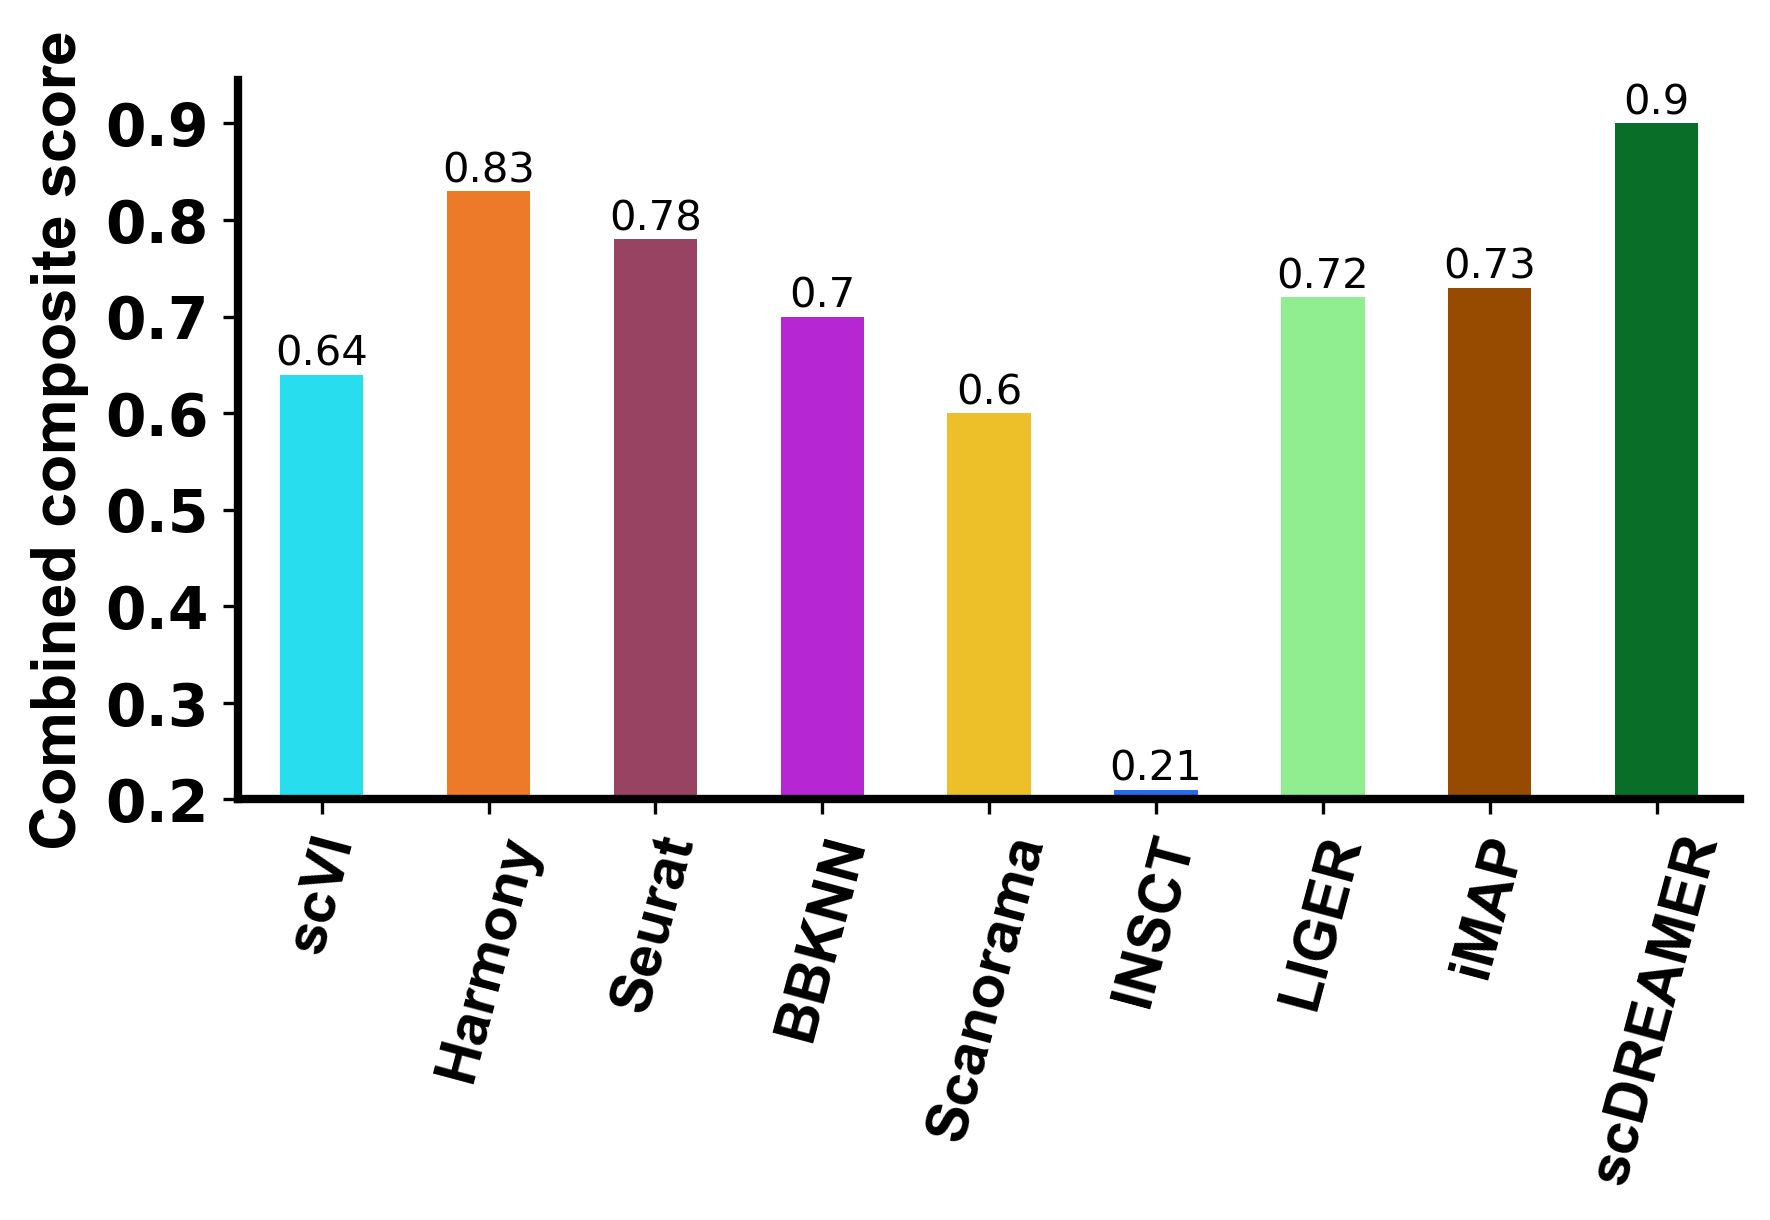

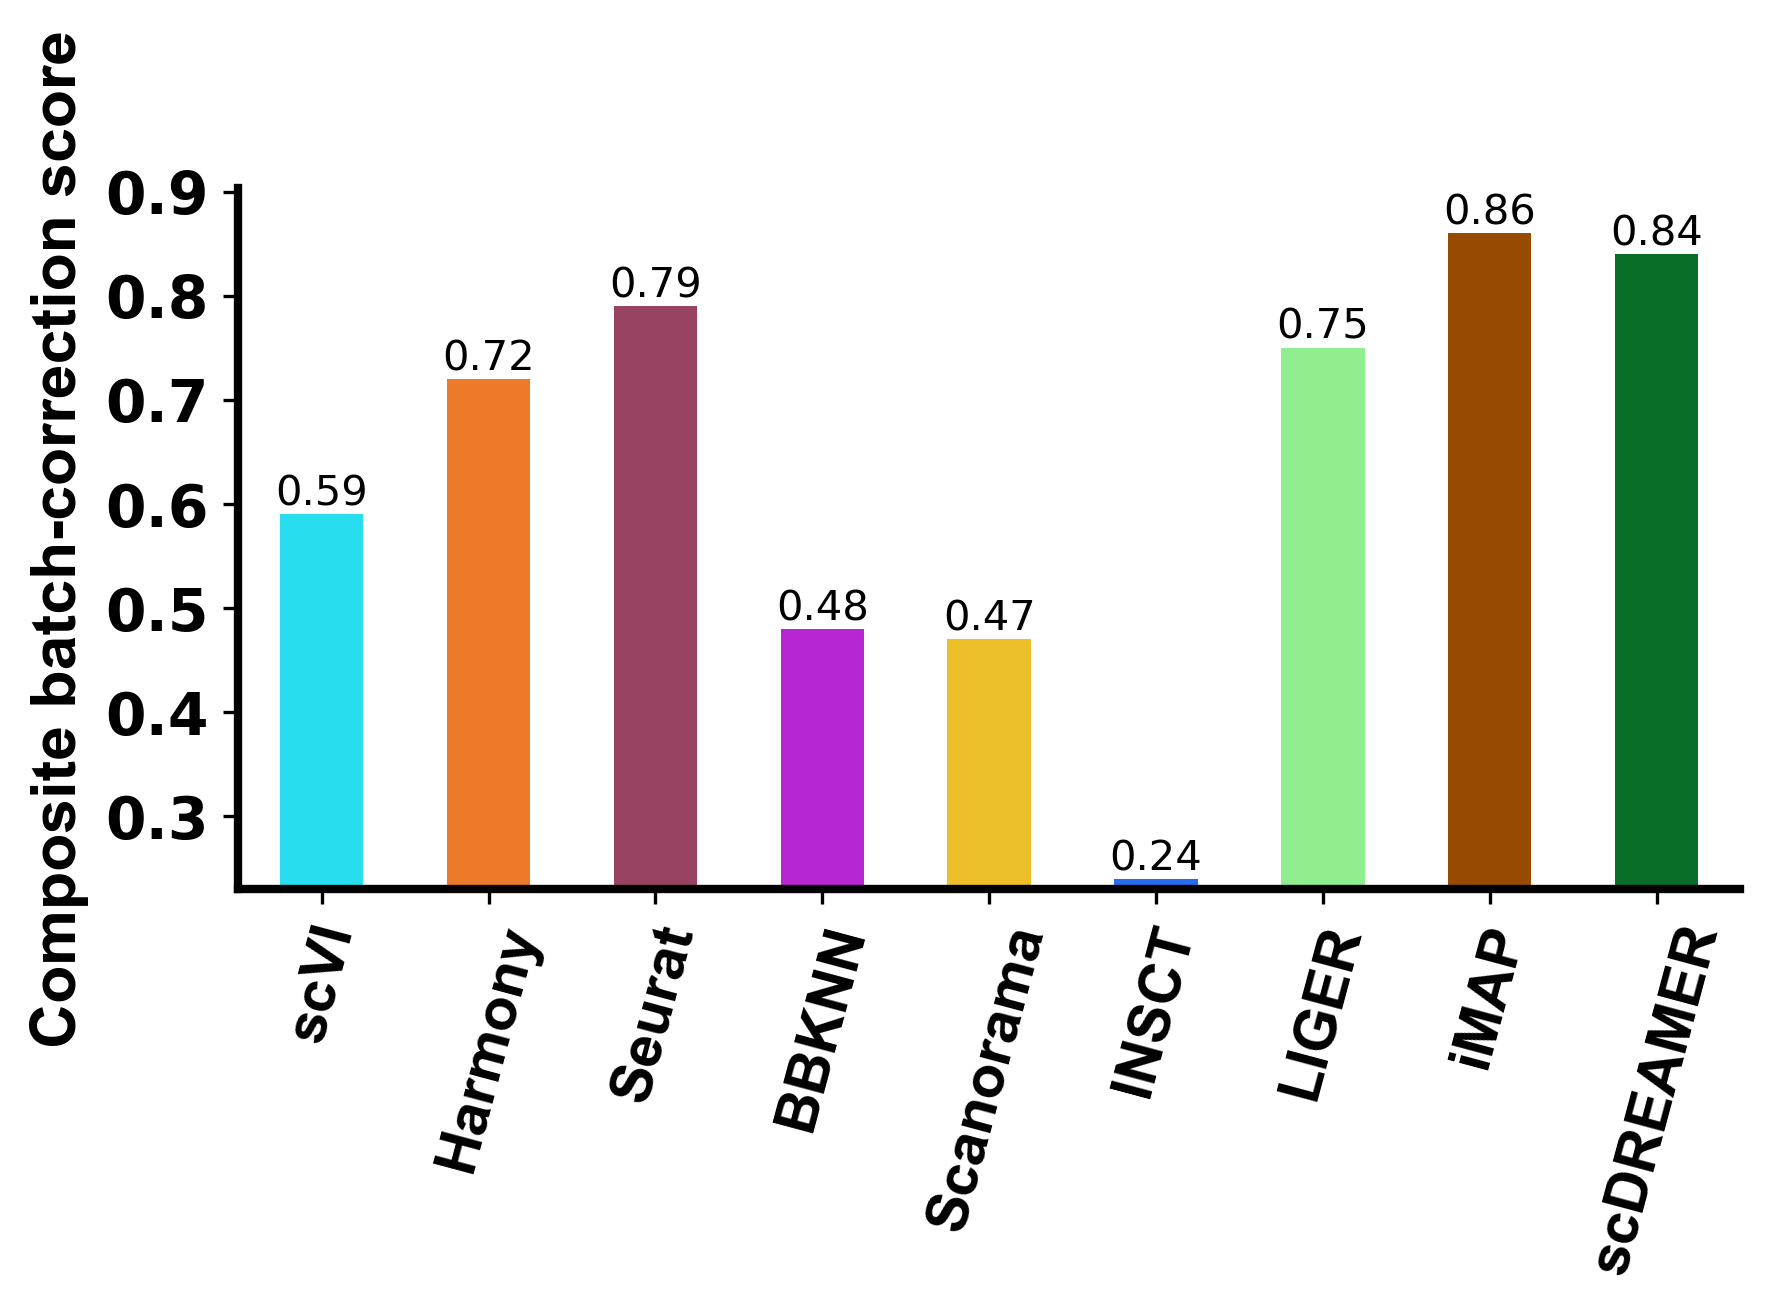

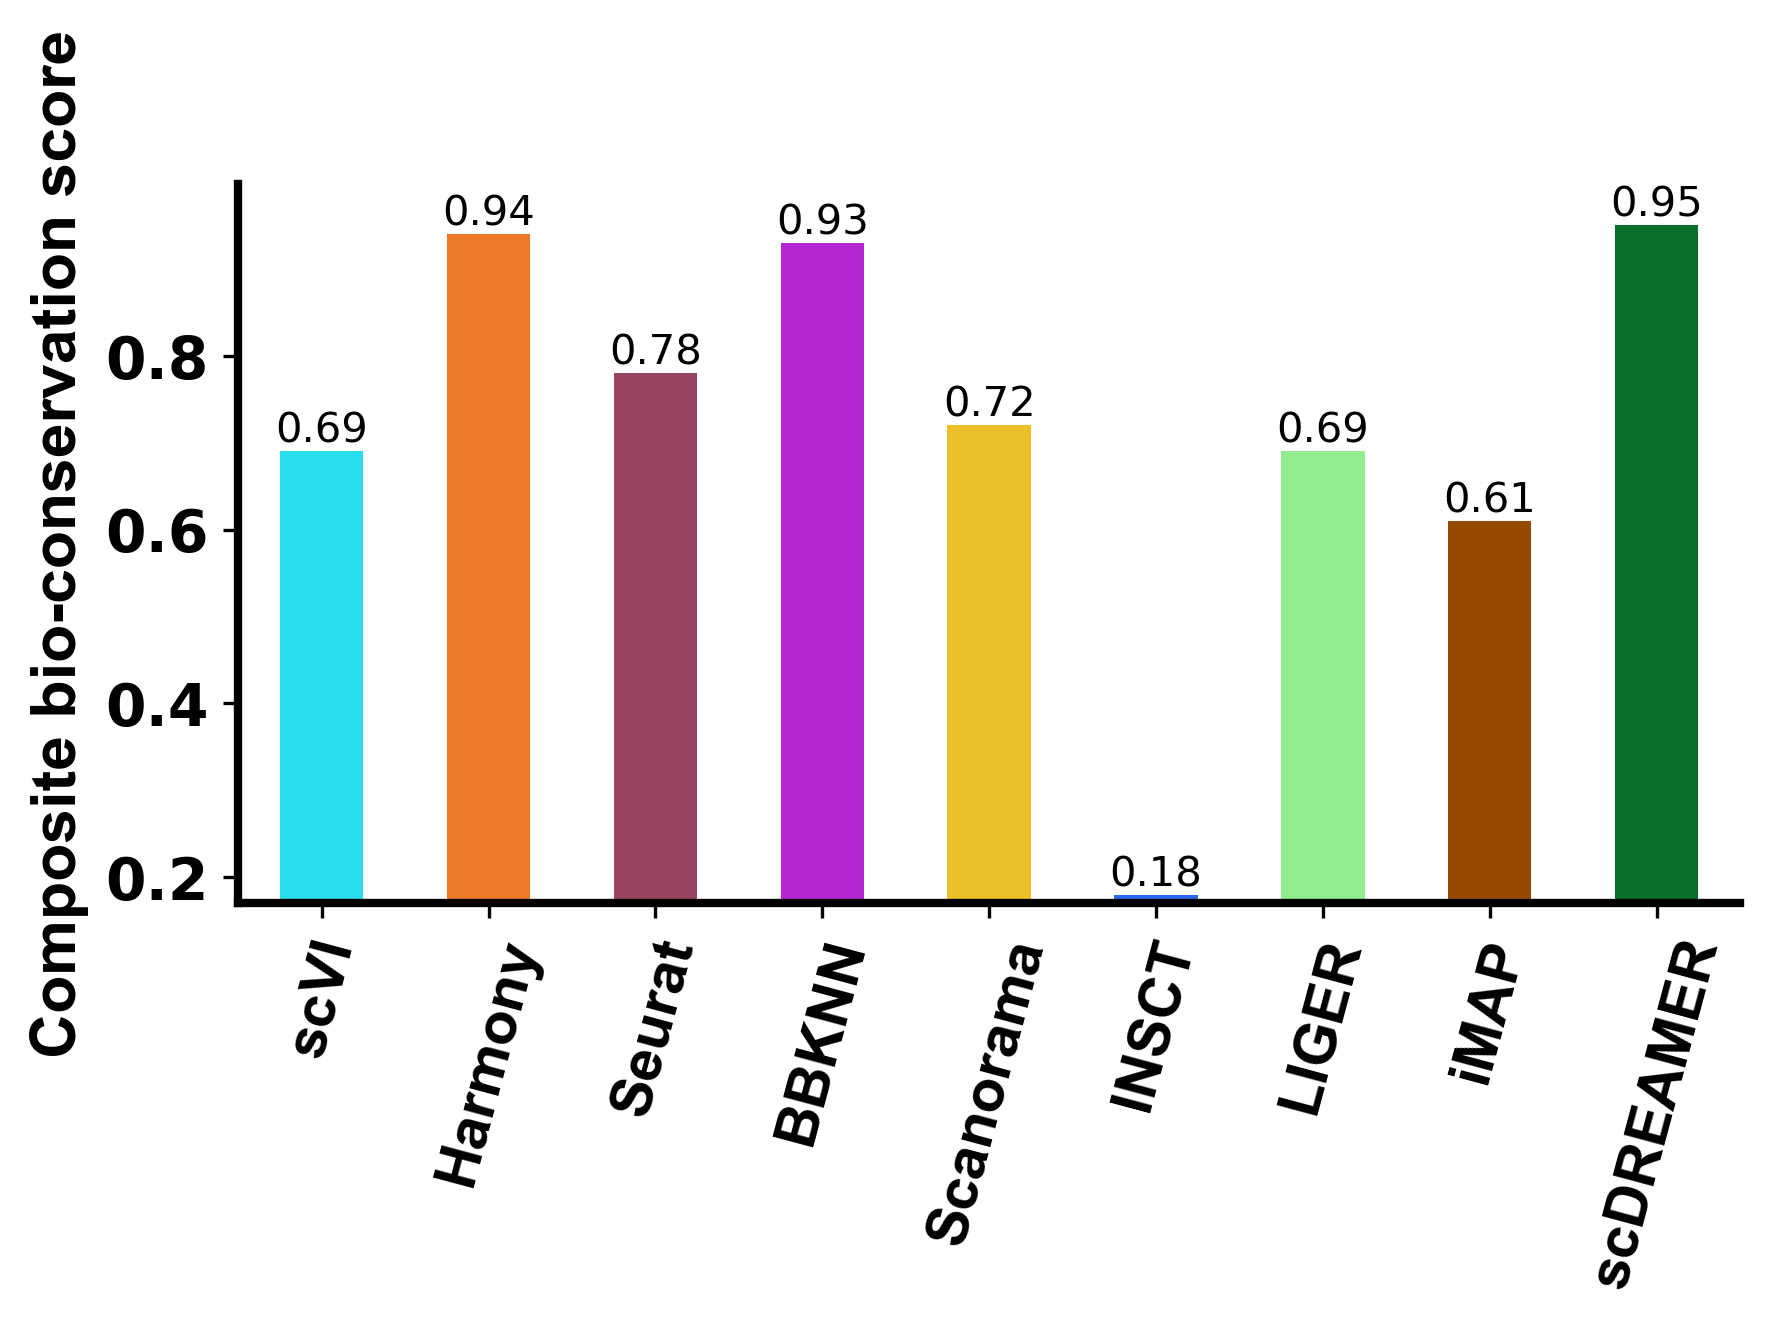

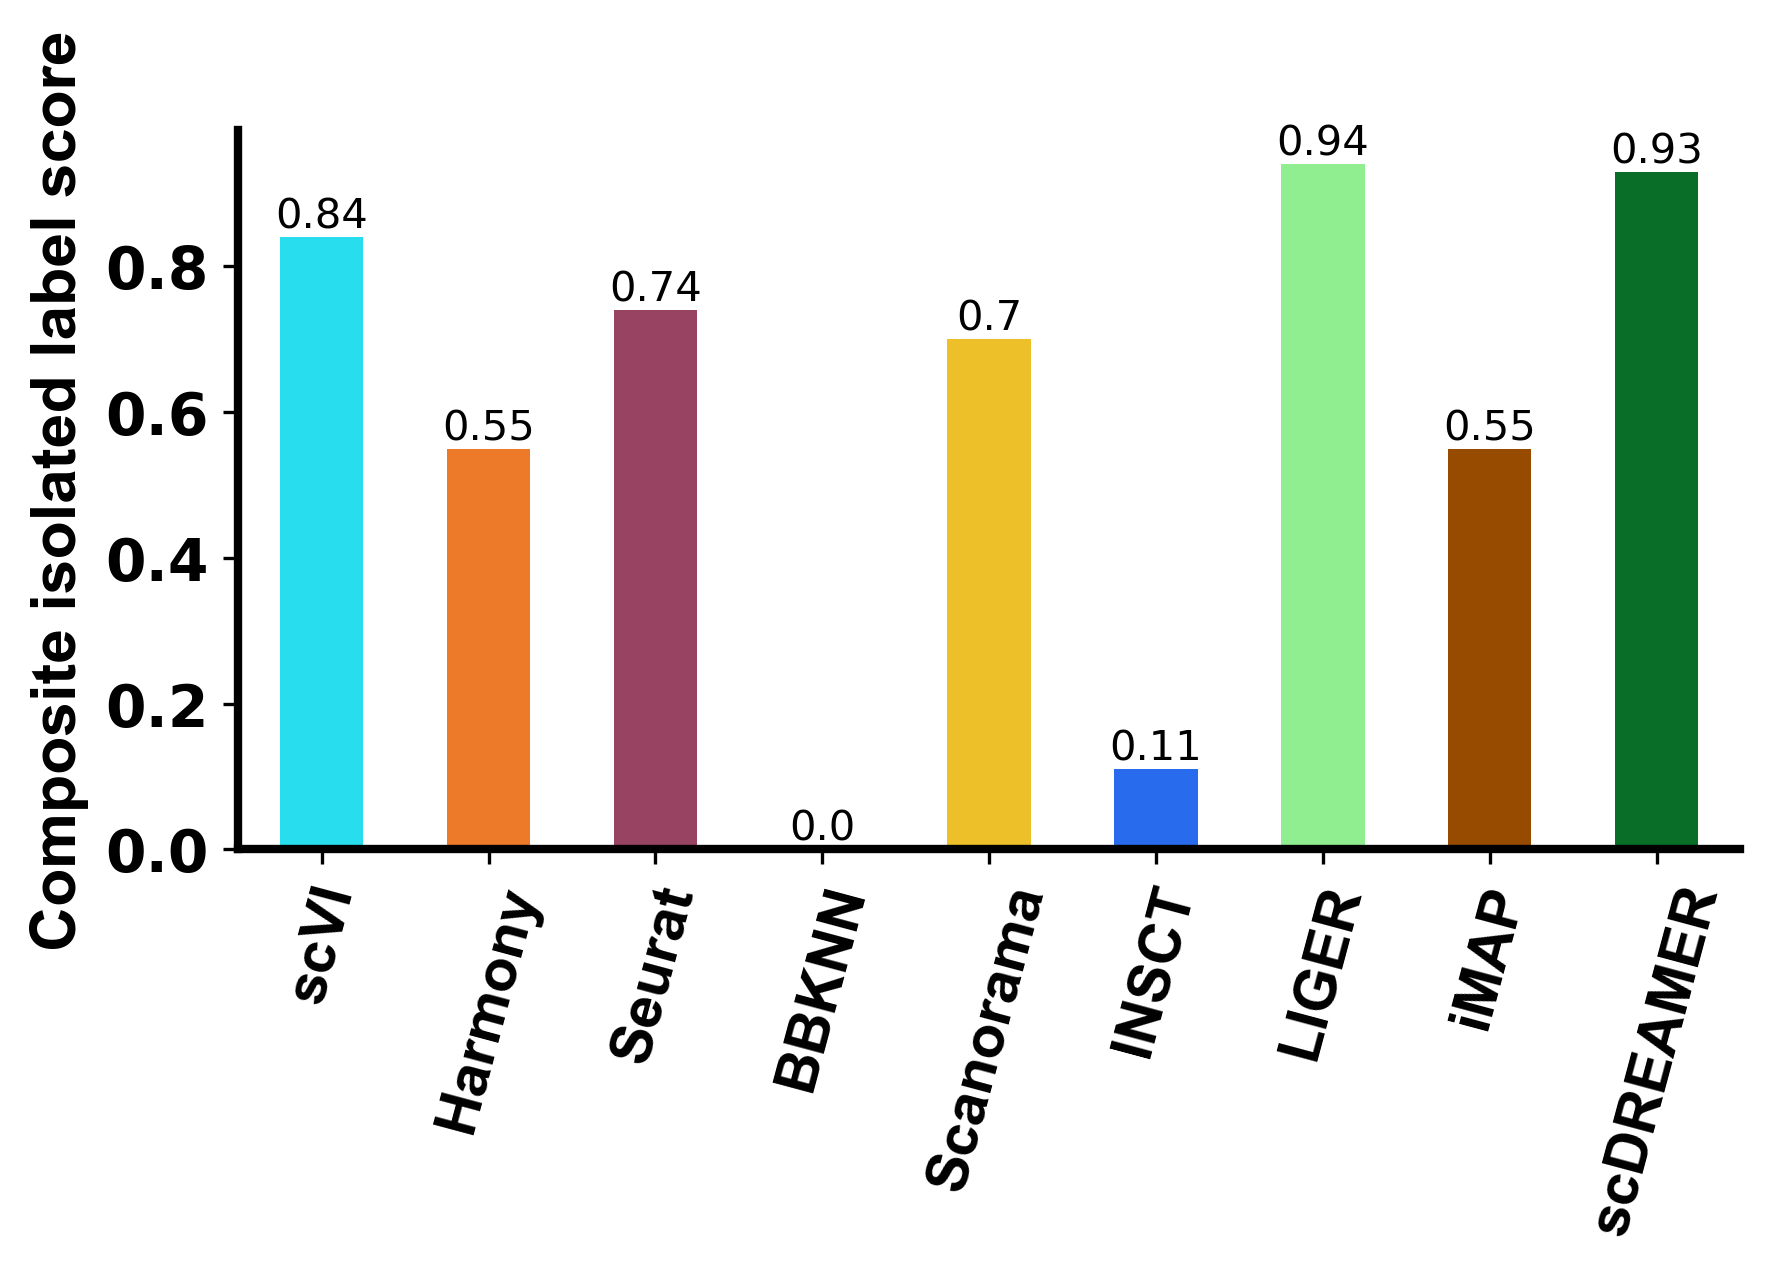

In [31]:
dataset = 'Pancreas'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
df_dataset  = df_dataset.loc[methods_to_plot,:]
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = calculate_composite(df_dataset)
display(df_dataset)
plot_composite(df_dataset,save_folder+dataset)

In [10]:
dataset = 'Pancreas'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
df_dataset  = df_dataset.loc[methods_to_plot,:]
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = calculate_composite(df_dataset)
df_dataset = df_dataset[["Composite bio-conservation score", "Composite batch-correction score",
                         "Composite isolated label score", "Combined composite score"]]
df_dataset.to_csv('./Composite_Scores/'+dataset+'_composite_scores.csv')

# Human_Retina

,NMI cluster/label,ARI cluster/label,ASW label,ASW label/batch,PCR batch,isolated f1 score,isolated silhouette coefficient,graph connectivity,kBET,iLISI,...,Percentage_wrong,trajectory,NMI k-means,comments,Unnamed: 17,color,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,,,,,,,,,,,,,,,,,,
scVI,0.99,1.00,0.26,0.77,0.96,1.00,1.00,0.93,0.79,0.81,...,0.0,NaN,0.90,Insct error: Cannot return the results in a co...,NaN,#28DDED,0.75,0.86,1.00,0.80
Harmony,0.96,0.99,0.29,0.90,0.62,0.14,0.40,0.84,0.96,0.85,...,0.0,NaN,0.92,NaN,NaN,#ED7A28,0.75,0.83,0.27,0.79
Seurat,0.95,0.98,0.36,0.33,0.91,0.90,0.61,0.82,0.25,0.55,...,0.0,NaN,0.90,NaN,NaN,#994363,0.76,0.58,0.75,0.67
BBKNN,0.94,0.98,NaN,NaN,NaN,0.15,NaN,1.00,0.18,0.18,...,0.0,NaN,0.86,NaN,NaN,#B626D3,0.96,0.59,0.15,0.78
Scanorama,0.00,0.00,0.00,1.00,0.00,0.33,0.67,0.94,0.00,0.00,...,0.0,NaN,0.67,NaN,NaN,#EDBF28,0.00,0.49,0.50,0.24
INSCT,0.81,0.94,1.00,0.00,0.51,0.29,0.00,0.57,0.78,0.82,...,0.0,NaN,NaN,NaN,NaN,#286CED,0.92,0.47,0.14,0.69
LIGER,0.70,0.81,0.46,0.73,0.88,0.34,0.34,0.52,0.92,1.00,...,0.0,NaN,NaN,NaN,NaN,#90EE90,0.66,0.76,0.34,0.71
iMAP,0.59,0.87,0.00,0.92,0.73,0.00,0.55,0.00,0.86,0.86,...,0.0,NaN,NaN,NaN,NaN,#964B00,0.49,0.63,0.28,0.56
scDREAMER,1.00,1.00,0.31,0.78,1.00,0.95,0.77,0.91,1.00,0.96,...,0.0,NaN,NaN,300,NaN,#086E28,0.77,0.92,0.86,0.85


./Main_Figures/Human_Retina


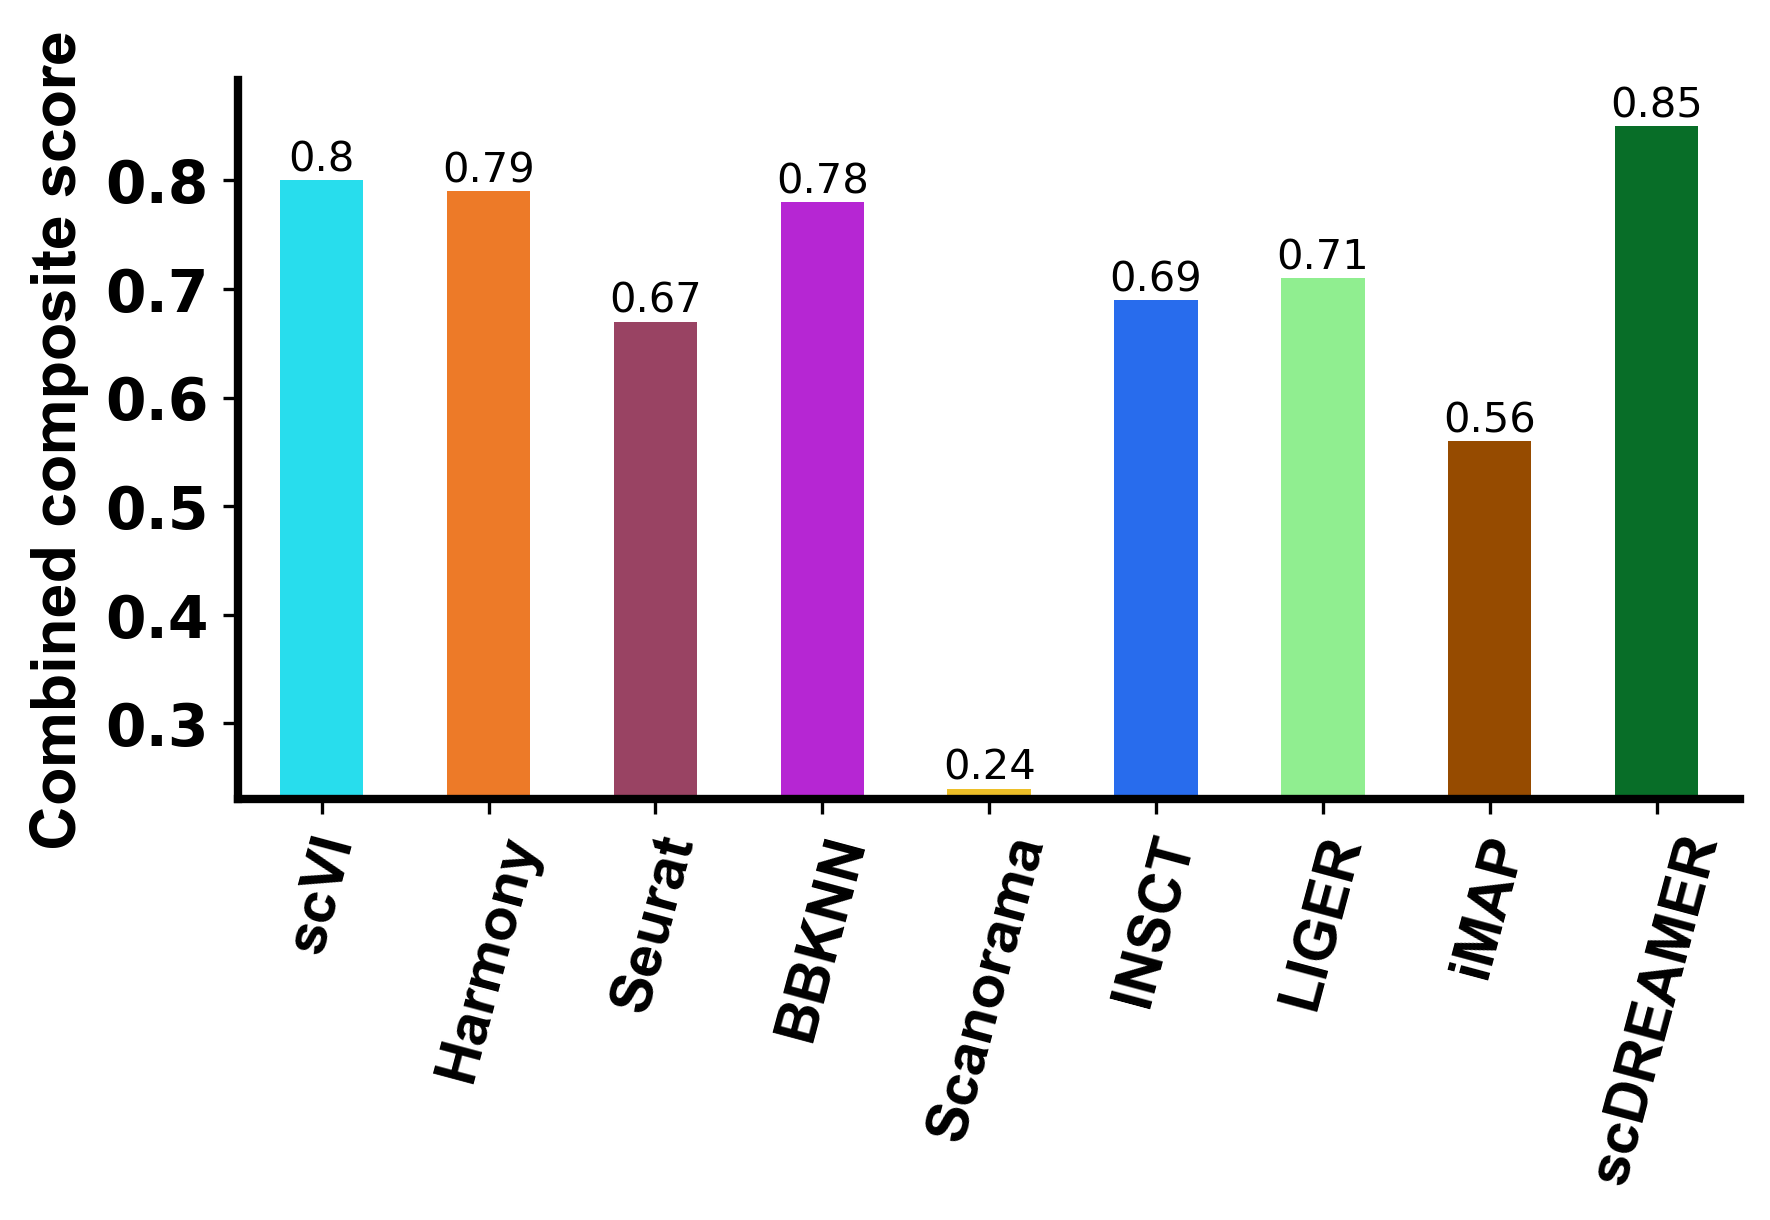

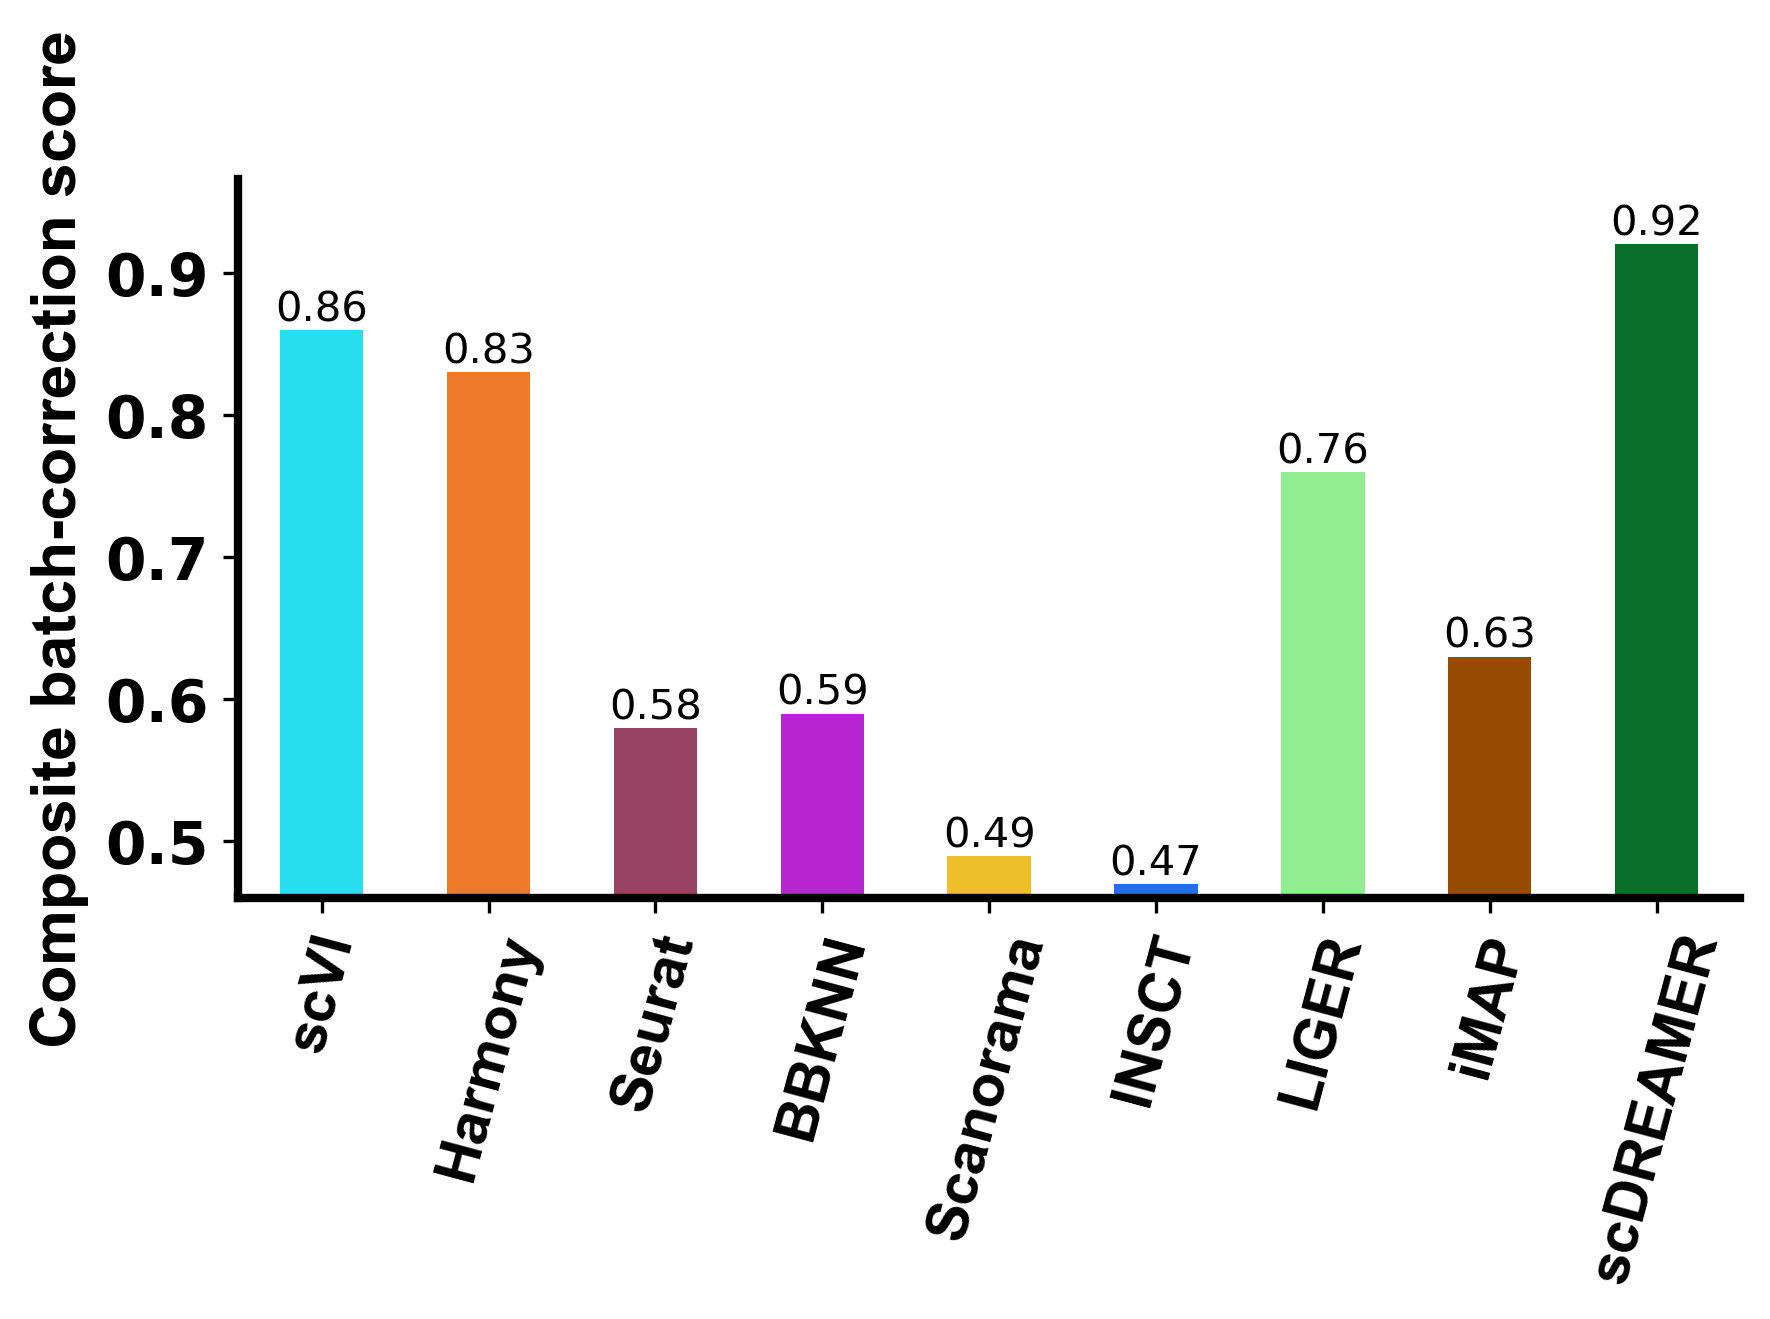

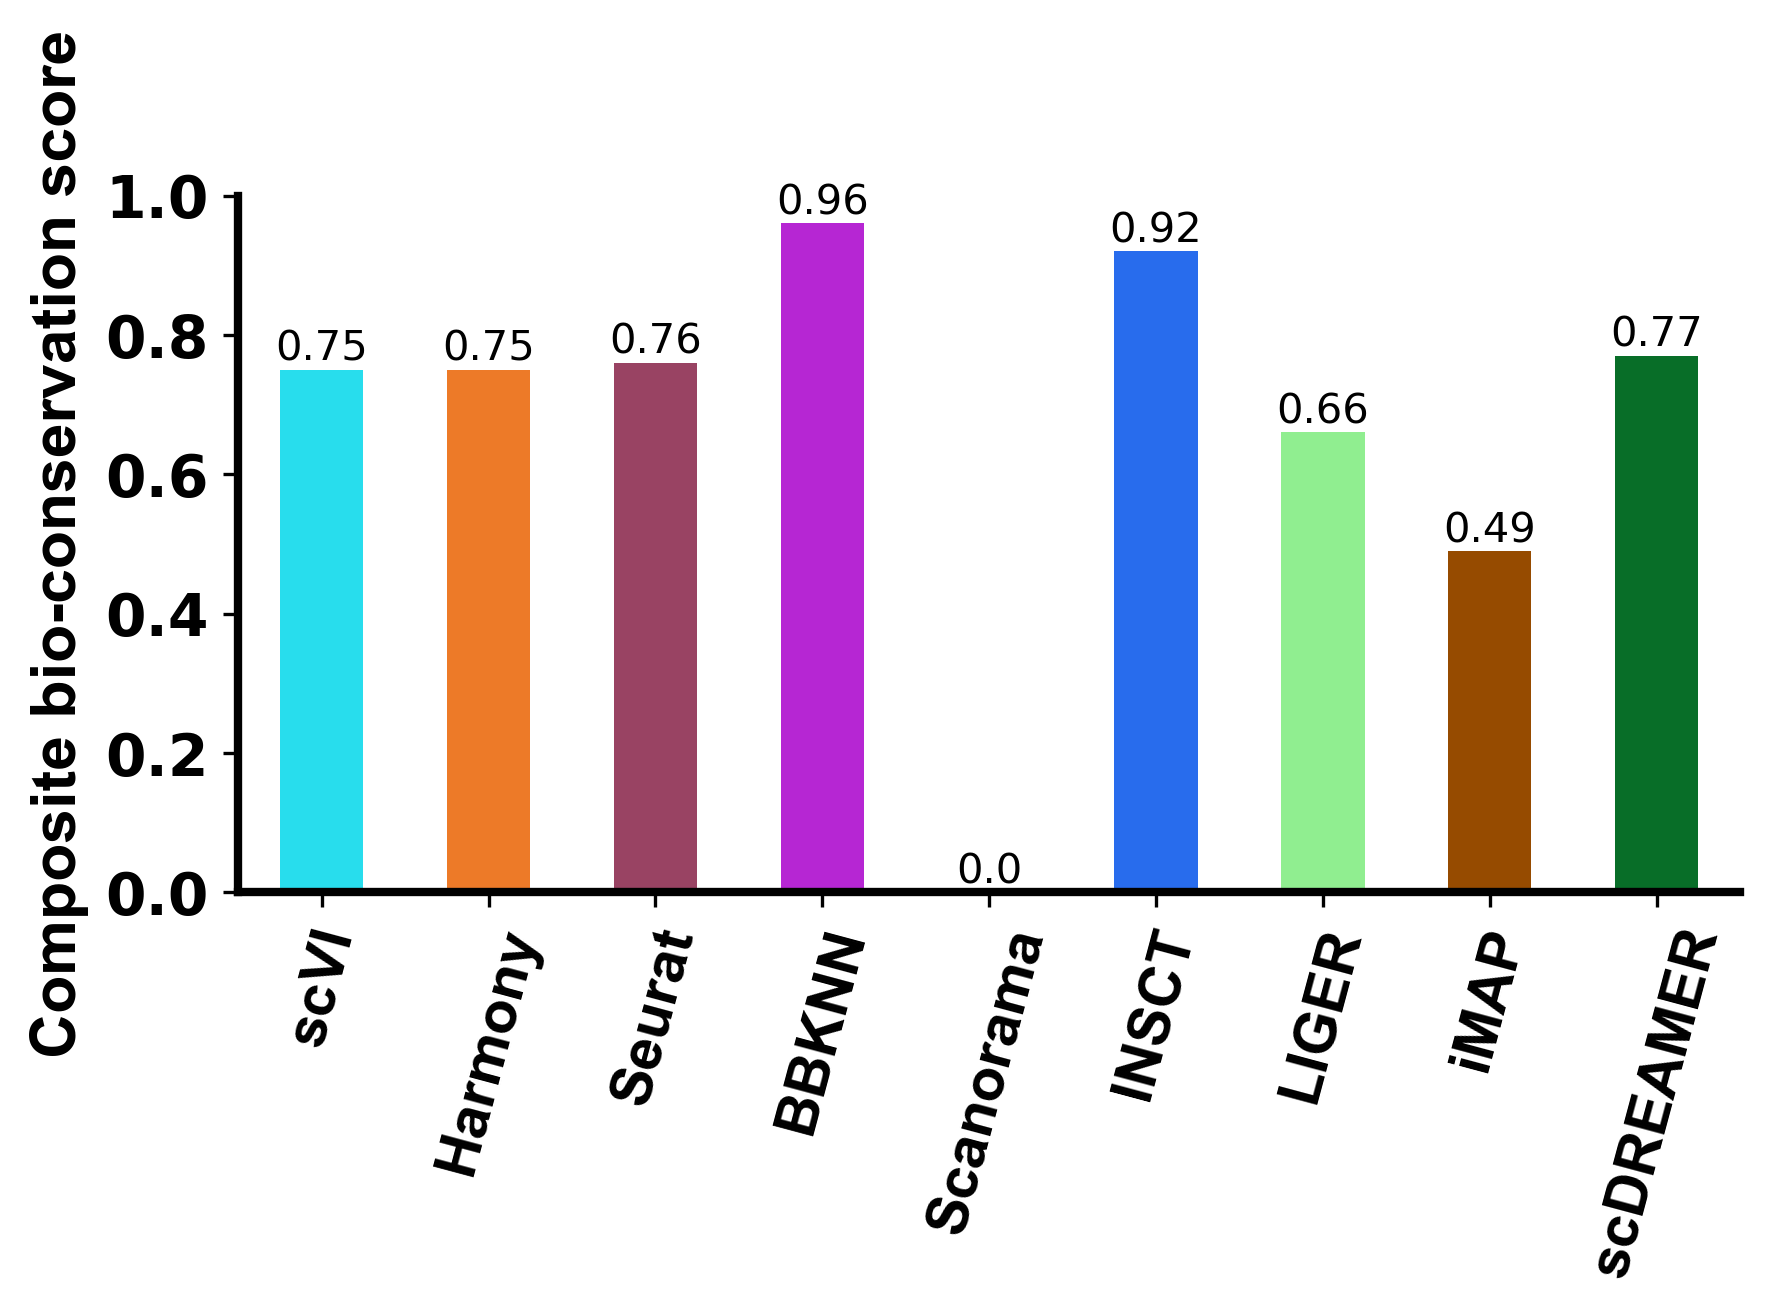

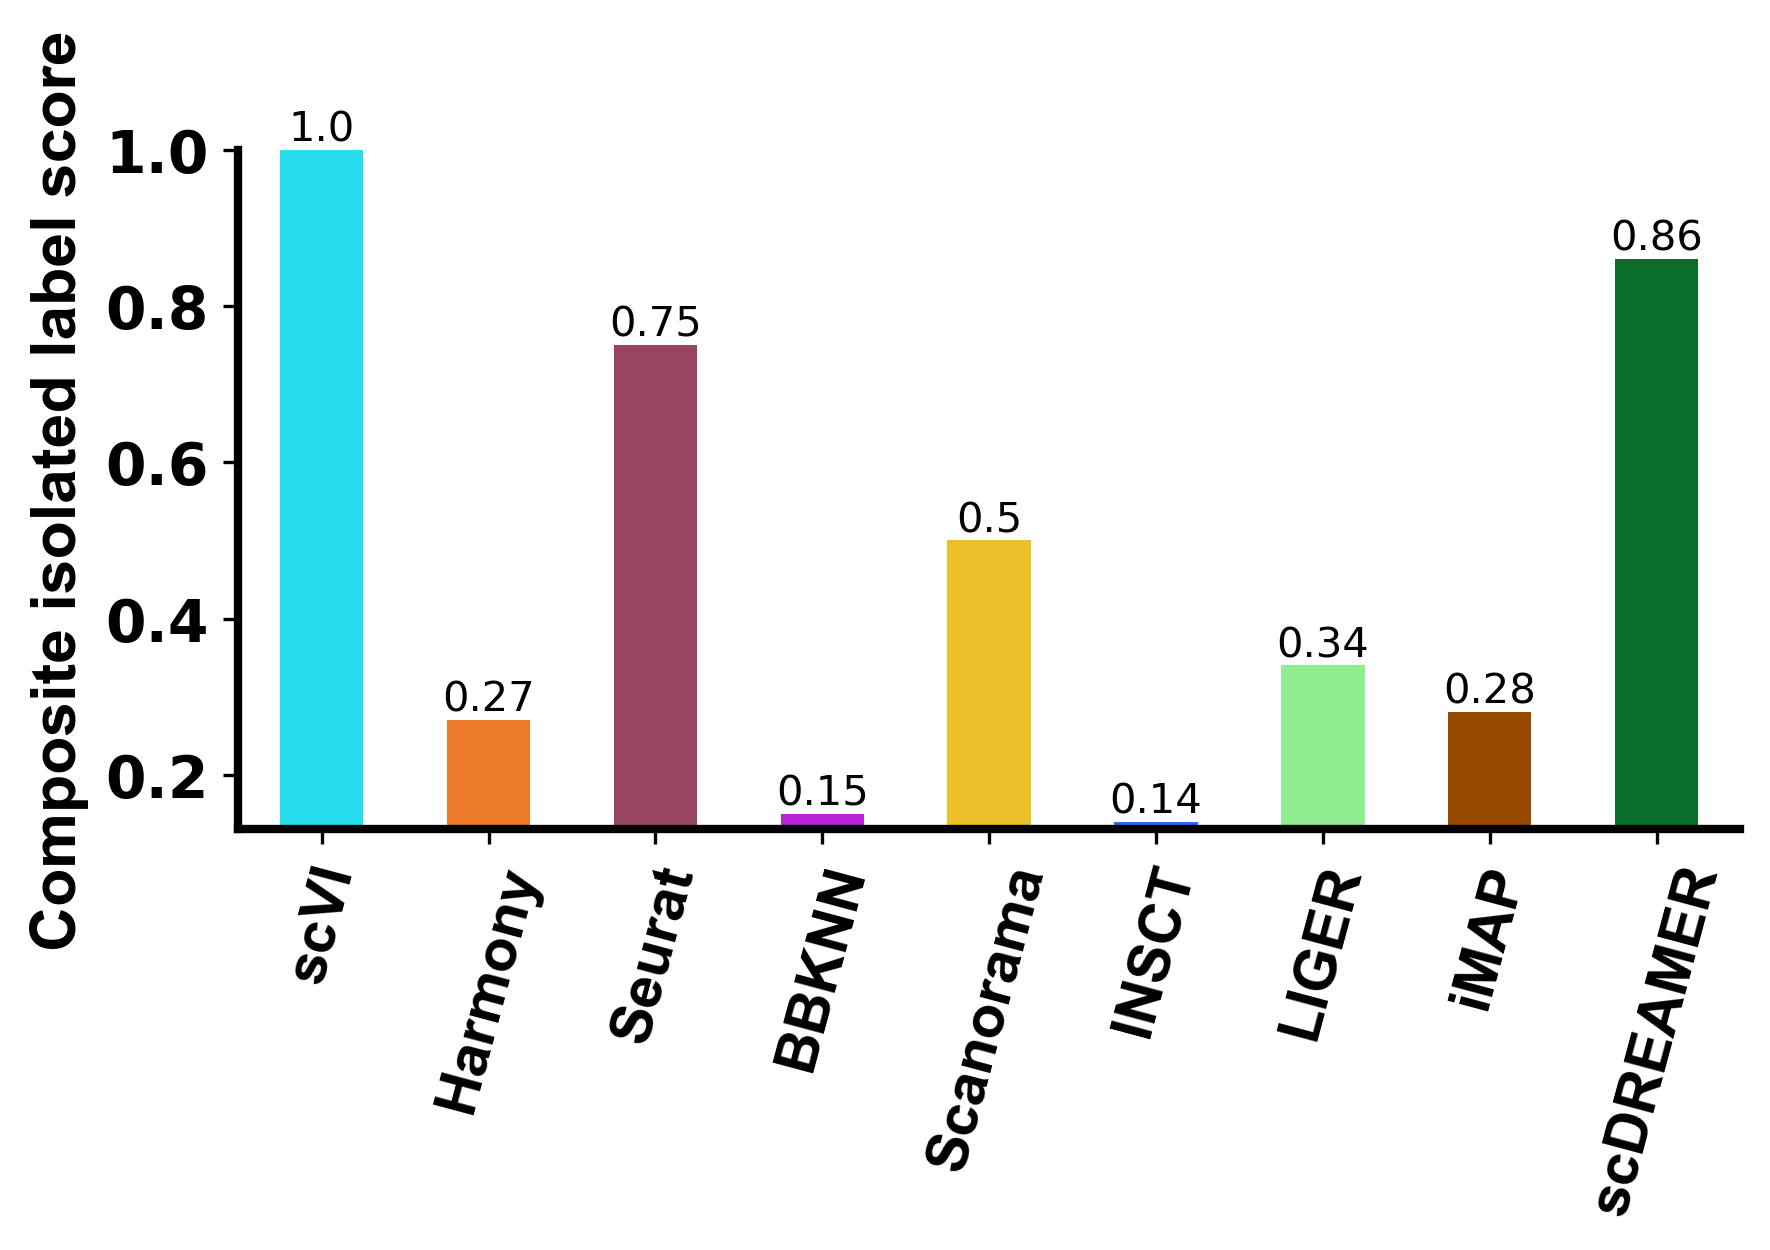

In [30]:
dataset = "Human_Retina"
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
df_dataset  = df_dataset.loc[methods_to_plot,:]
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = calculate_composite(df_dataset)
display(df_dataset)
plot_composite(df_dataset,save_folder+dataset)

In [11]:
dataset = 'Human_Retina'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
df_dataset  = df_dataset.loc[methods_to_plot,:]
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = calculate_composite(df_dataset)
df_dataset = df_dataset[["Composite bio-conservation score", "Composite batch-correction score",
                         "Composite isolated label score", "Combined composite score"]]
df_dataset.to_csv('./Composite_Scores/'+dataset+'_composite_scores.csv')

# Human Mouse

/home/krushna/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/krushna/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,NMI cluster/label,ARI cluster/label,ASW label,ASW label/batch,PCR batch,isolated f1 score,isolated silhouette coefficient,graph connectivity,kBET,iLISI,...,Percentage_wrong,trajectory,NMI k-means,comments,Unnamed: 17,color,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,,,,,,,,,,,,,,,,,,
scVI,0.81,0.83,1.00,0.55,0.41,NaN,NaN,0.71,0.55,0.10,...,0.0,NaN,0.64,seurat - cannot allocate vector of size 1491.9...,NaN,#28DDED,0.88,0.56,NaN,0.72
Harmony,1.00,1.00,0.76,0.92,1.00,NaN,NaN,1.00,0.74,0.00,...,0.0,NaN,0.39,NaN,NaN,#ED7A28,0.92,0.91,NaN,0.92
BBKNN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.00,...,0.0,NaN,0.60,NaN,NaN,#B626D3,0.00,0.00,NaN,0.00
Scanorama,0.66,0.76,0.93,1.00,0.00,NaN,NaN,0.87,0.51,0.15,...,0.0,NaN,0.56,NaN,NaN,#EDBF28,0.78,0.59,NaN,0.69
INSCT,1.00,1.00,0.00,0.00,0.10,NaN,NaN,1.00,0.00,0.00,...,0.0,NaN,NaN,NaN,NaN,#286CED,0.67,0.27,NaN,0.47
LIGER,1.00,1.00,0.49,0.47,0.99,NaN,NaN,1.00,1.00,0.00,...,0.0,NaN,NaN,isolated is not appplicable as only 2 batches ...,NaN,#90EE90,0.83,0.86,NaN,0.85
iMAP,1.00,1.00,0.95,0.45,0.97,NaN,NaN,1.00,0.22,0.00,...,0.0,NaN,NaN,NaN,NaN,#964B00,0.98,0.66,NaN,0.82
scDREAMER,1.00,1.00,0.98,0.56,0.97,NaN,NaN,1.00,0.56,0.00,...,0.0,NaN,71.21,450,NaN,#086E28,0.99,0.77,NaN,0.88


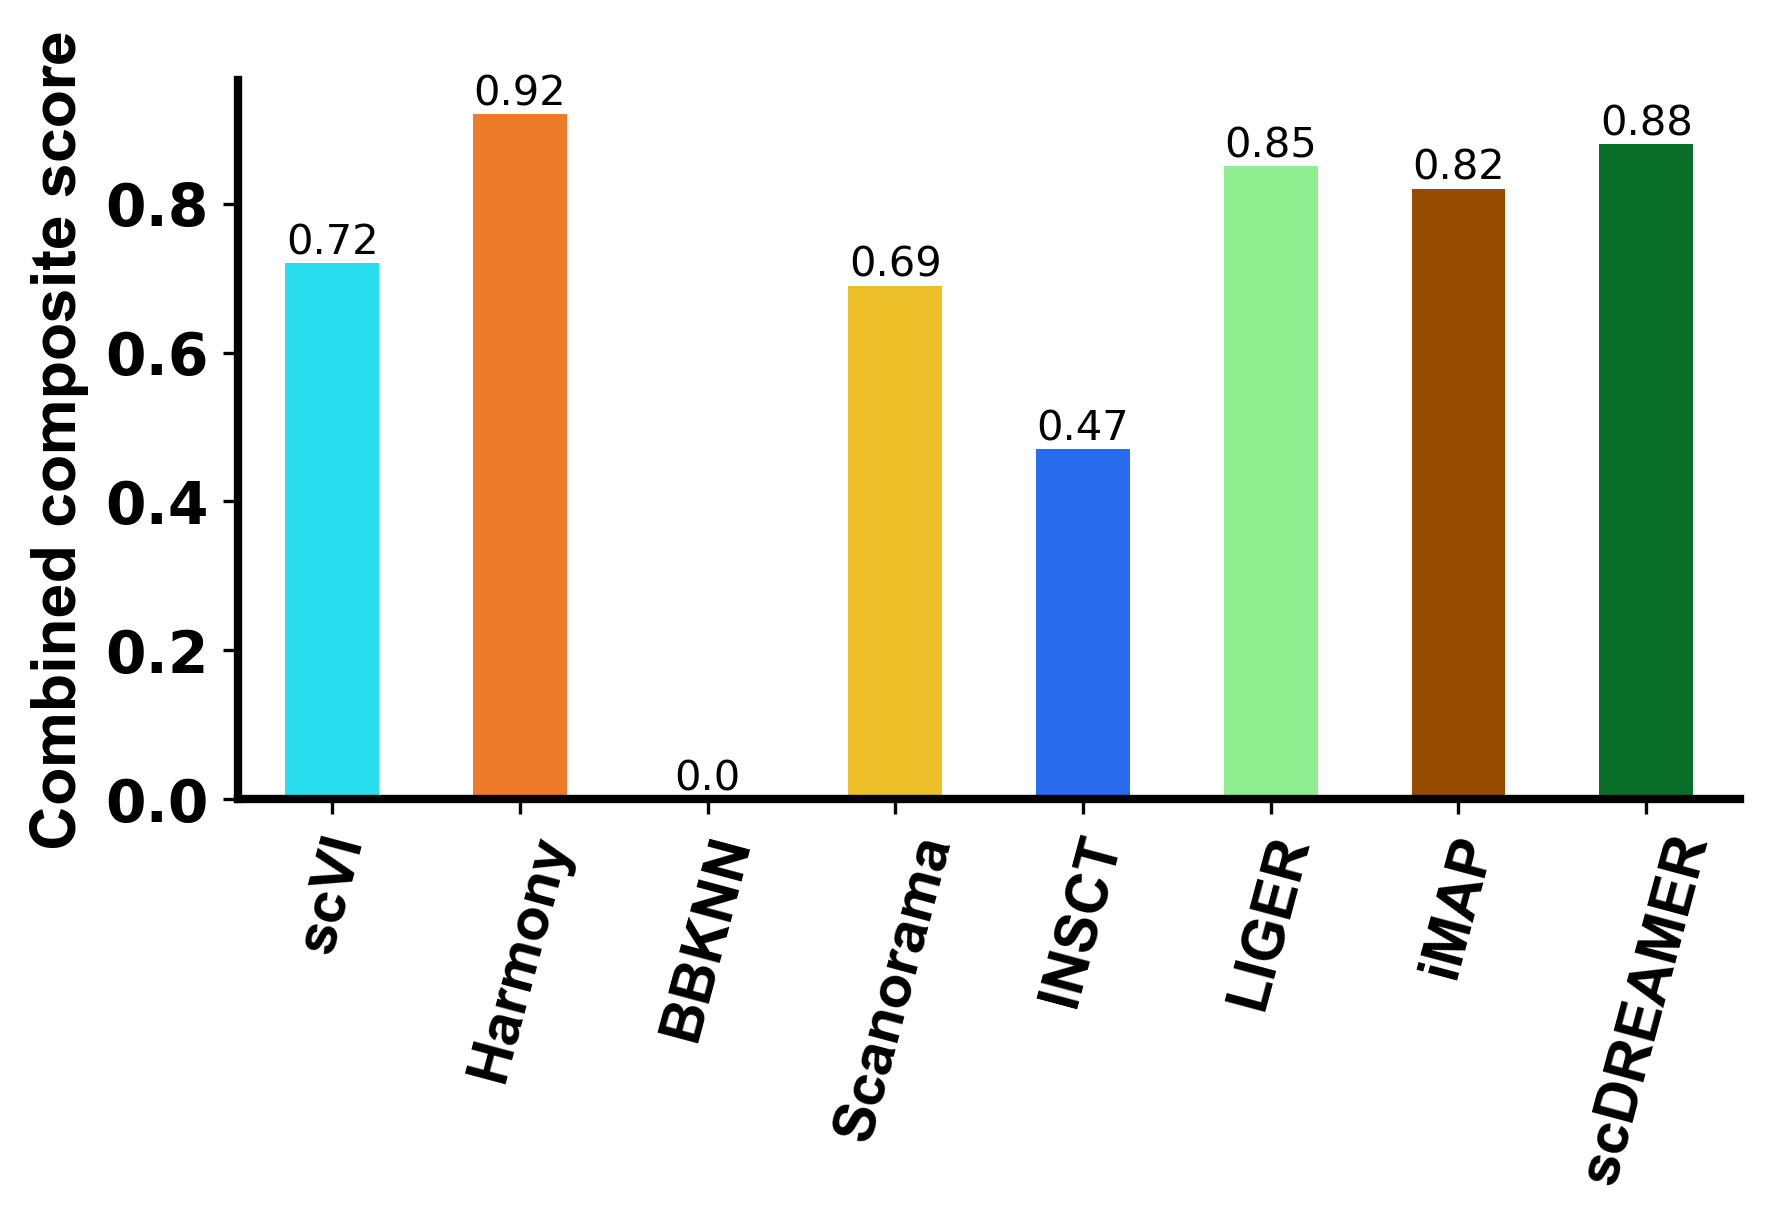

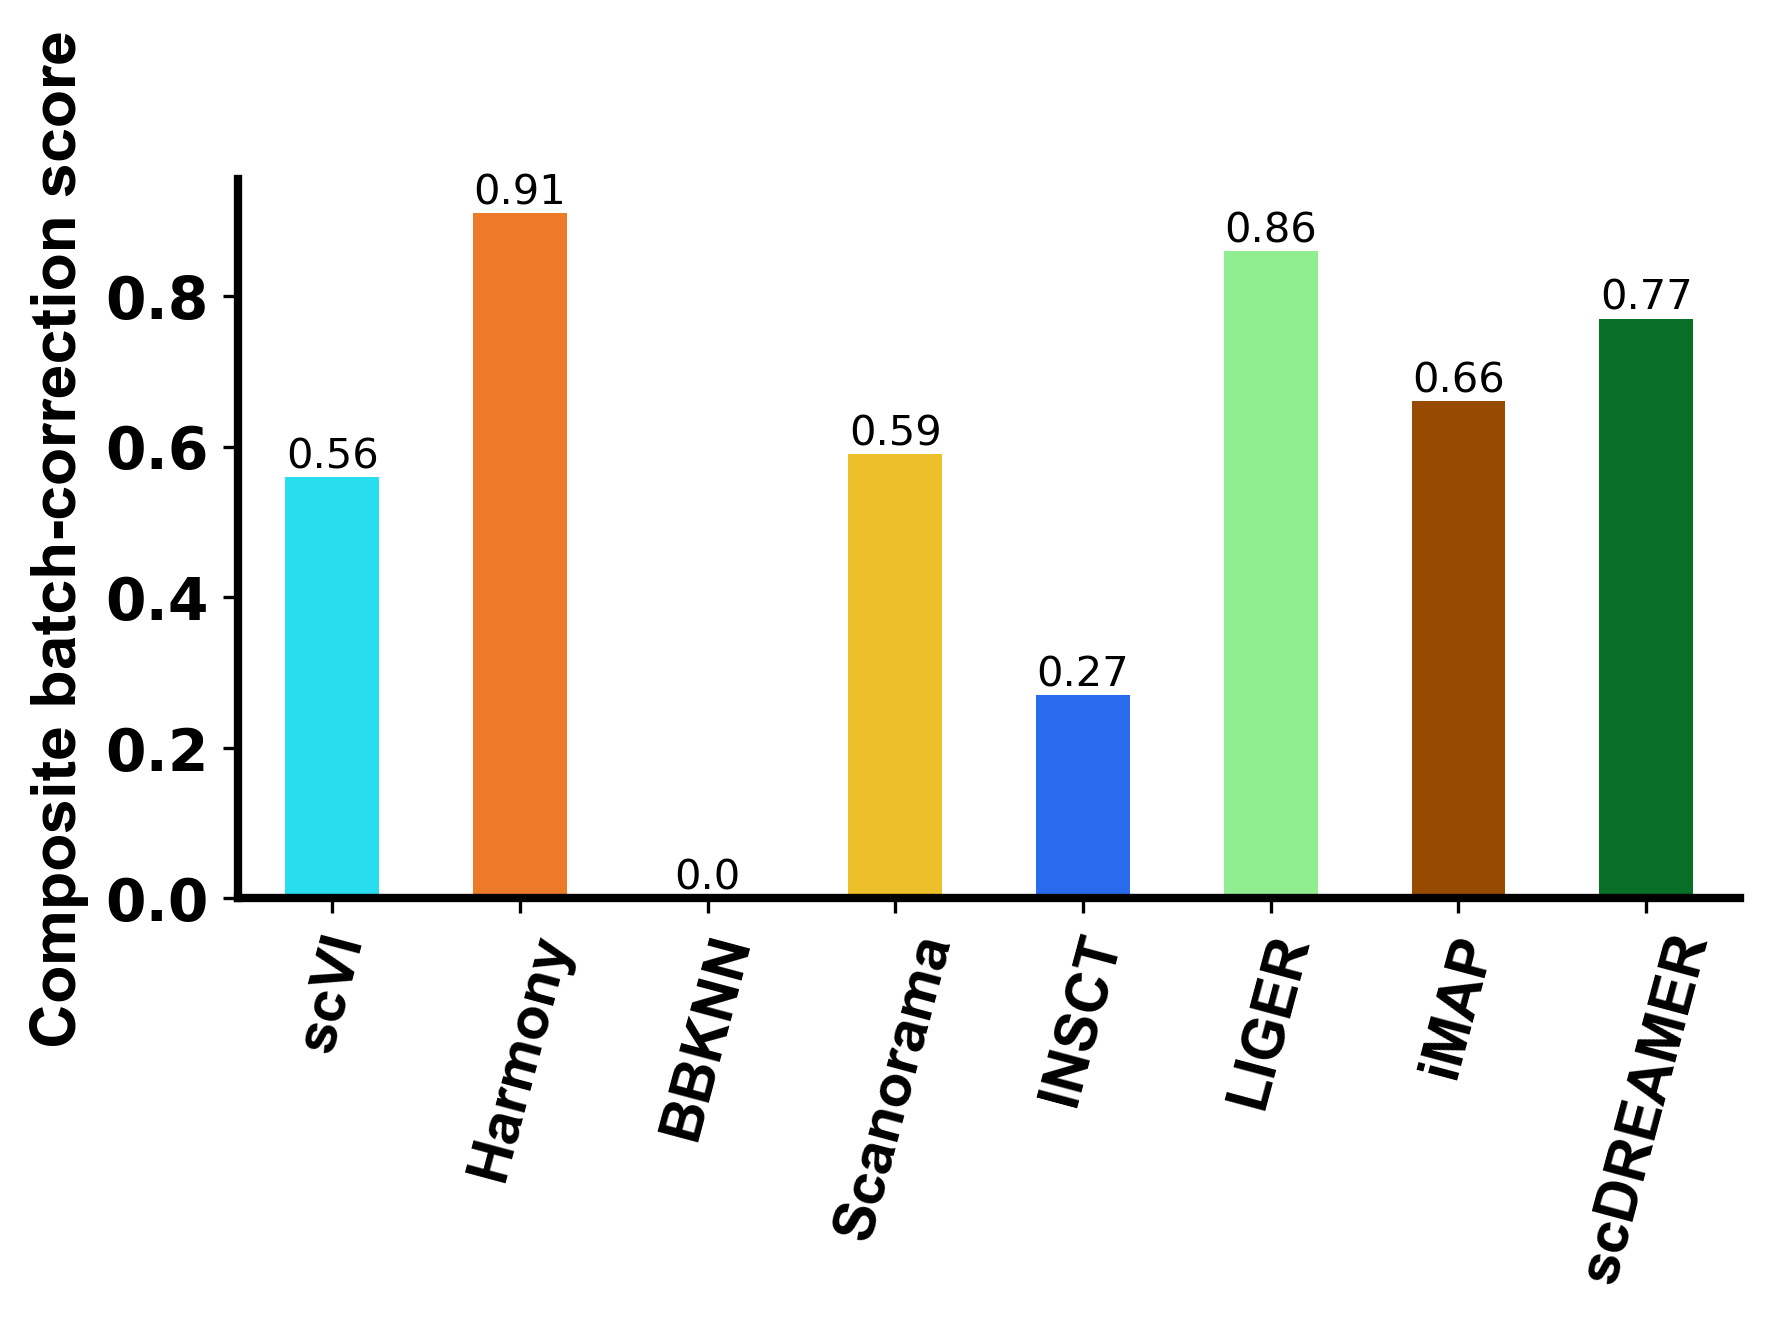

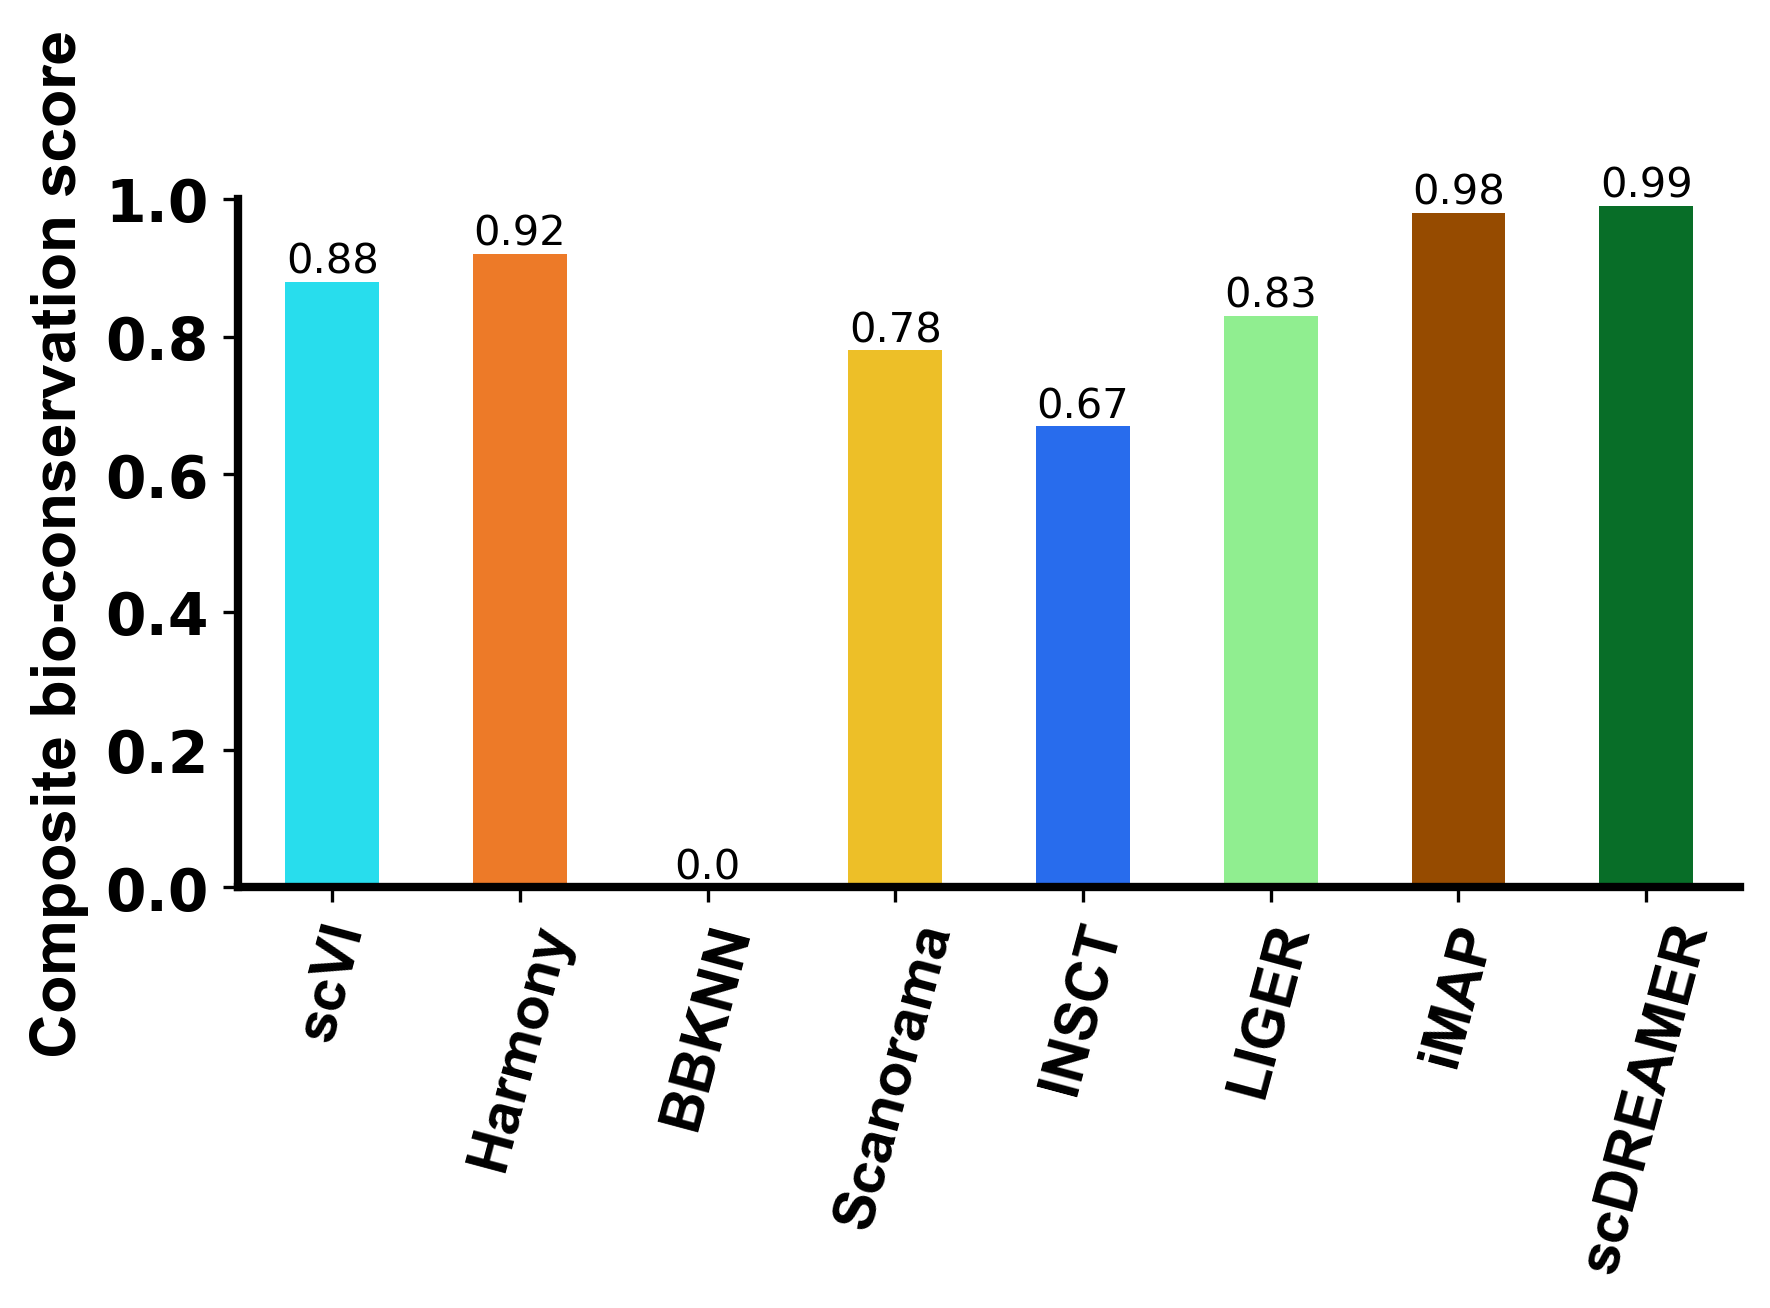

ValueError: Axis limits cannot be NaN or Inf

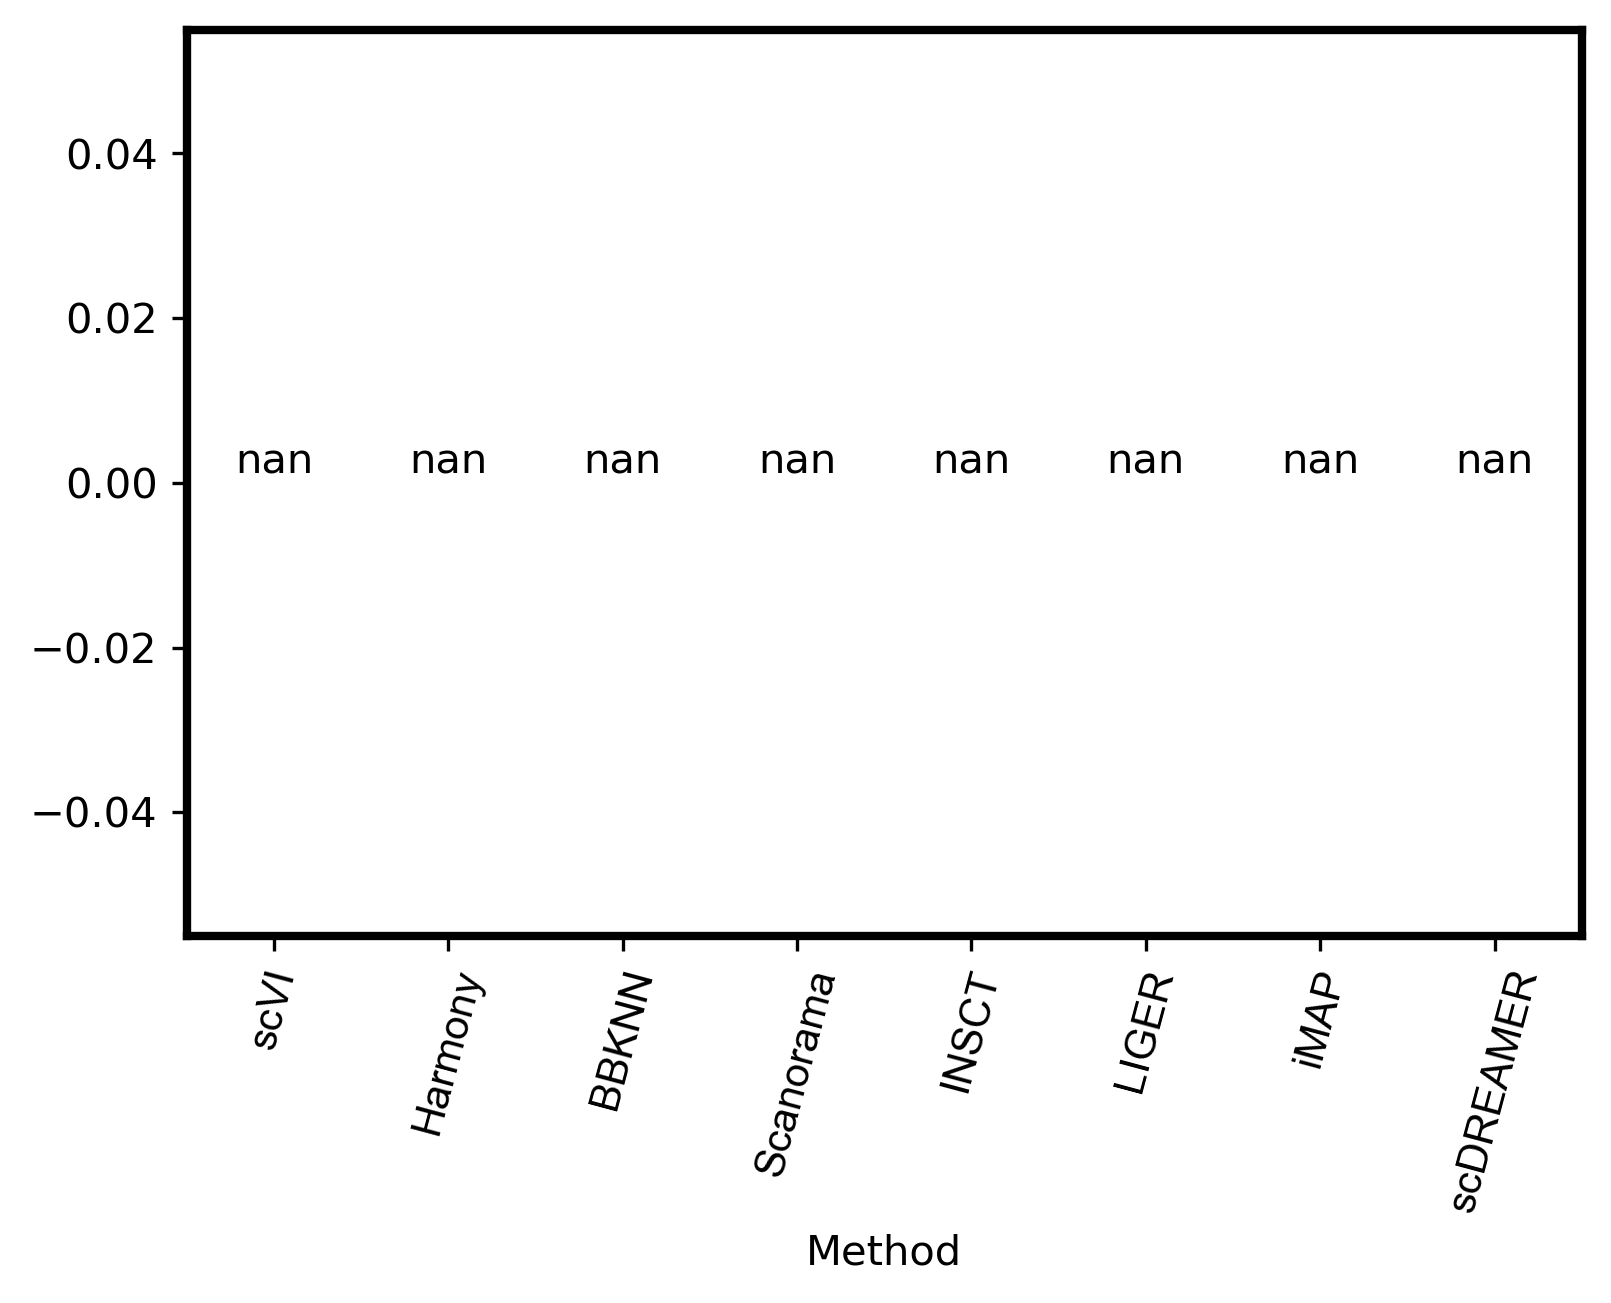

In [35]:
dataset = "Human_Mouse"
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
methods_to_plot_hm = methods_to_plot.copy()
methods_to_plot_hm.remove('Seurat')
df_dataset  = df_dataset.loc[methods_to_plot_hm,:]
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = calculate_composite(df_dataset)
display(df_dataset)
plot_composite(df_dataset,save_folder+dataset)

In [12]:
dataset = "Human_Mouse"
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
methods_to_plot_hm = methods_to_plot.copy()
methods_to_plot_hm.remove('Seurat')
df_dataset  = df_dataset.loc[methods_to_plot_hm,:]
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = calculate_composite(df_dataset)
df_dataset = df_dataset[["Composite bio-conservation score", "Composite batch-correction score",
                         "Composite isolated label score", "Combined composite score"]]
df_dataset.to_csv('./Composite_Scores/'+dataset+'_composite_scores.csv')

/home/krushna/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/krushna/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


# Lung

,NMI cluster/label,ARI cluster/label,ASW label,ASW label/batch,PCR batch,isolated f1 score,isolated silhouette coefficient,graph connectivity,kBET,iLISI,...,Percentage_wrong,trajectory,NMI k-means,comments,Unnamed: 17,color,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,,,,,,,,,,,,,,,,,,
scVI,0.29,0.23,0.34,0.73,1.00,0.81,0.74,0.75,0.29,0.49,...,0.0,NaN,0.65,NaN,NaN,#28DDED,0.29,0.69,0.78,0.49
Harmony,0.22,0.17,0.34,0.68,0.45,0.00,0.40,0.47,0.66,0.62,...,0.0,NaN,0.64,NaN,NaN,#ED7A28,0.24,0.57,0.20,0.40
Seurat,0.01,0.10,0.00,0.63,0.86,0.58,1.00,0.52,0.10,0.81,...,0.0,NaN,0.15,NaN,NaN,#994363,0.04,0.53,0.79,0.28
BBKNN,0.23,0.18,NaN,NaN,NaN,0.20,NaN,0.91,0.11,1.00,...,0.0,NaN,0.67,NaN,NaN,#B626D3,0.21,0.51,0.20,0.36
Scanorama,0.30,0.09,0.22,1.00,0.00,0.59,0.54,0.49,0.18,0.25,...,0.0,NaN,0.70,NaN,NaN,#EDBF28,0.20,0.42,0.56,0.31
INSCT,0.01,0.00,0.08,0.00,0.56,0.14,0.01,0.00,0.74,0.53,...,0.0,NaN,0.61,NaN,NaN,#286CED,0.03,0.32,0.08,0.18
LIGER,0.00,0.00,0.21,0.60,0.88,0.06,0.00,0.12,0.78,0.72,...,0.0,NaN,NaN,NaN,NaN,#90EE90,0.07,0.59,0.03,0.33
iMAP,0.33,0.04,0.34,0.85,0.00,0.53,0.55,0.48,0.00,0.00,...,0.0,NaN,NaN,NaN,NaN,#964B00,0.24,0.33,0.54,0.28
scDREAMER,0.34,0.27,0.42,0.71,0.88,0.83,0.55,0.67,0.67,0.65,...,0.0,NaN,NaN,300 epoch,0.88,#086E28,0.34,0.73,0.69,0.54


./Main_Figures/Lung


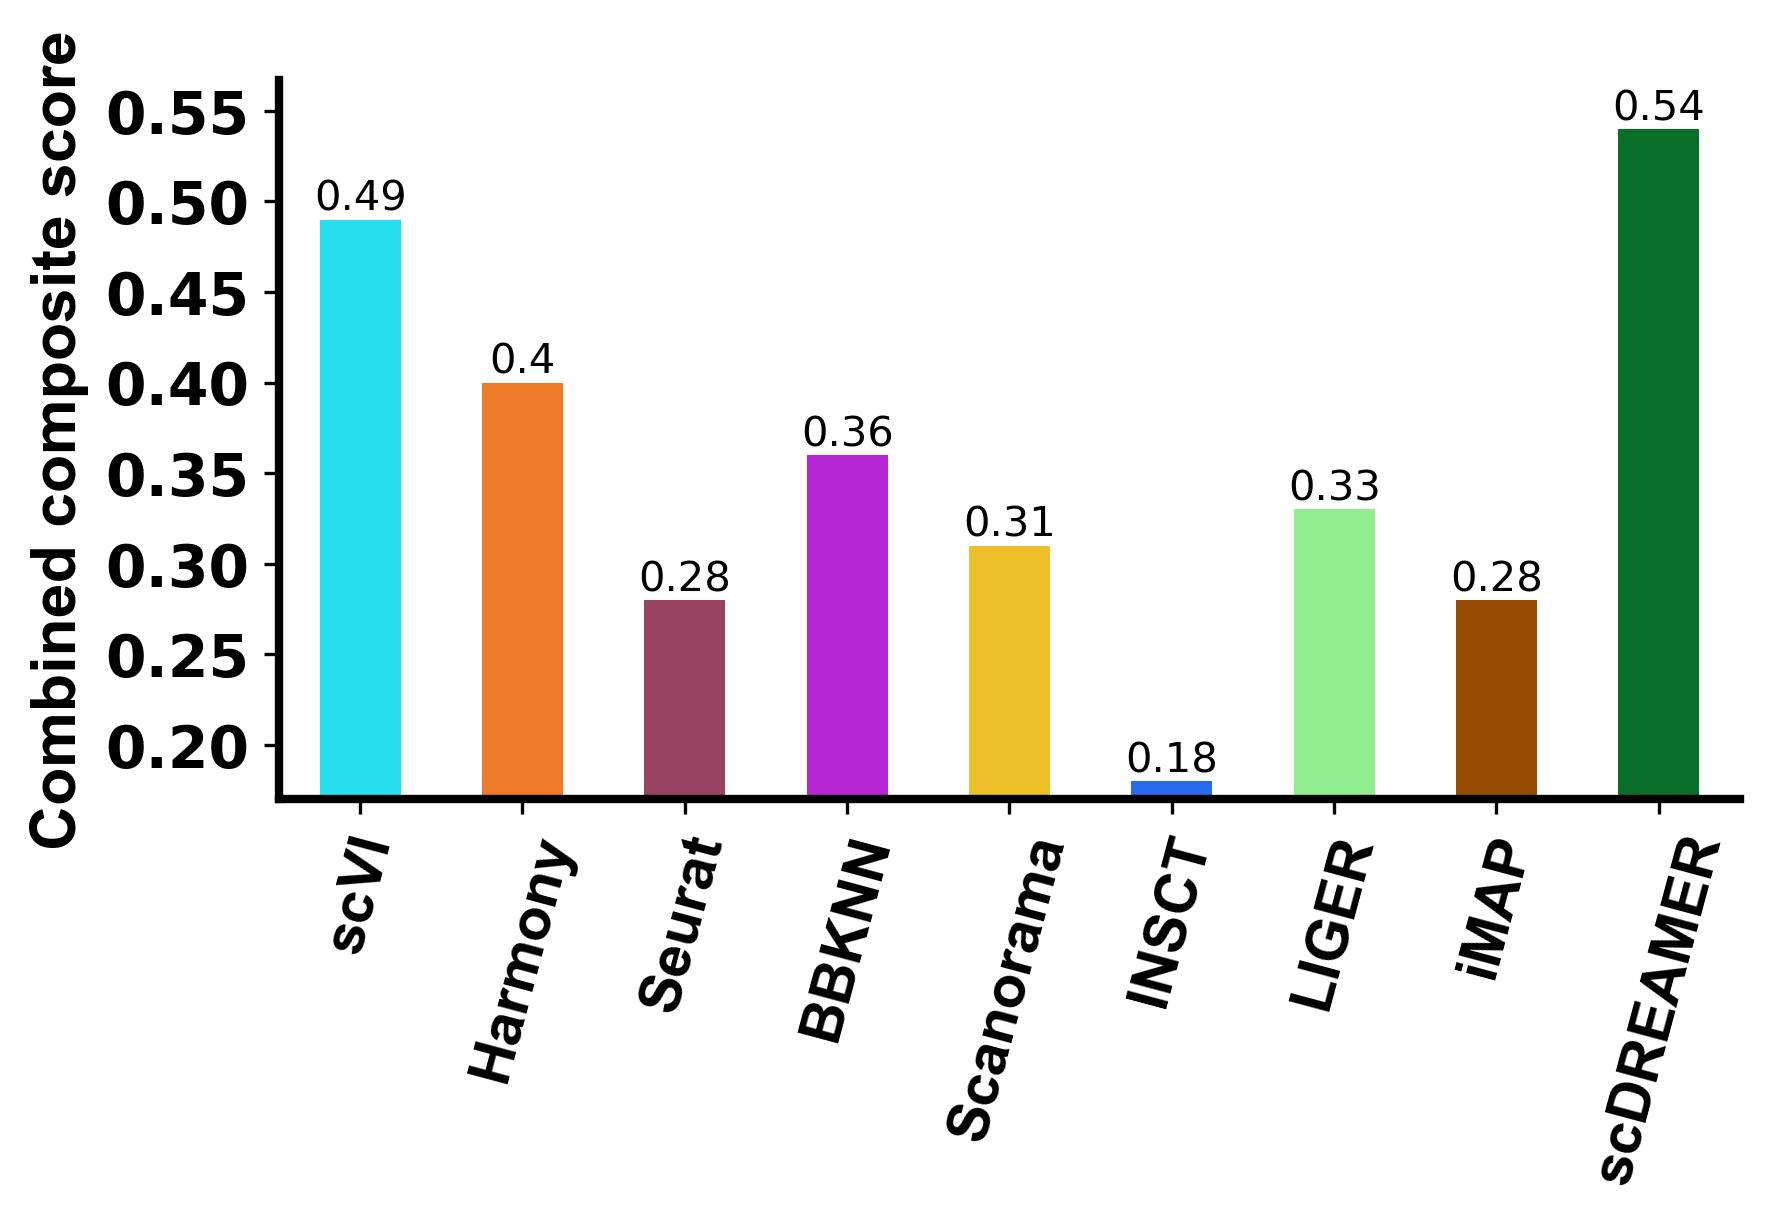

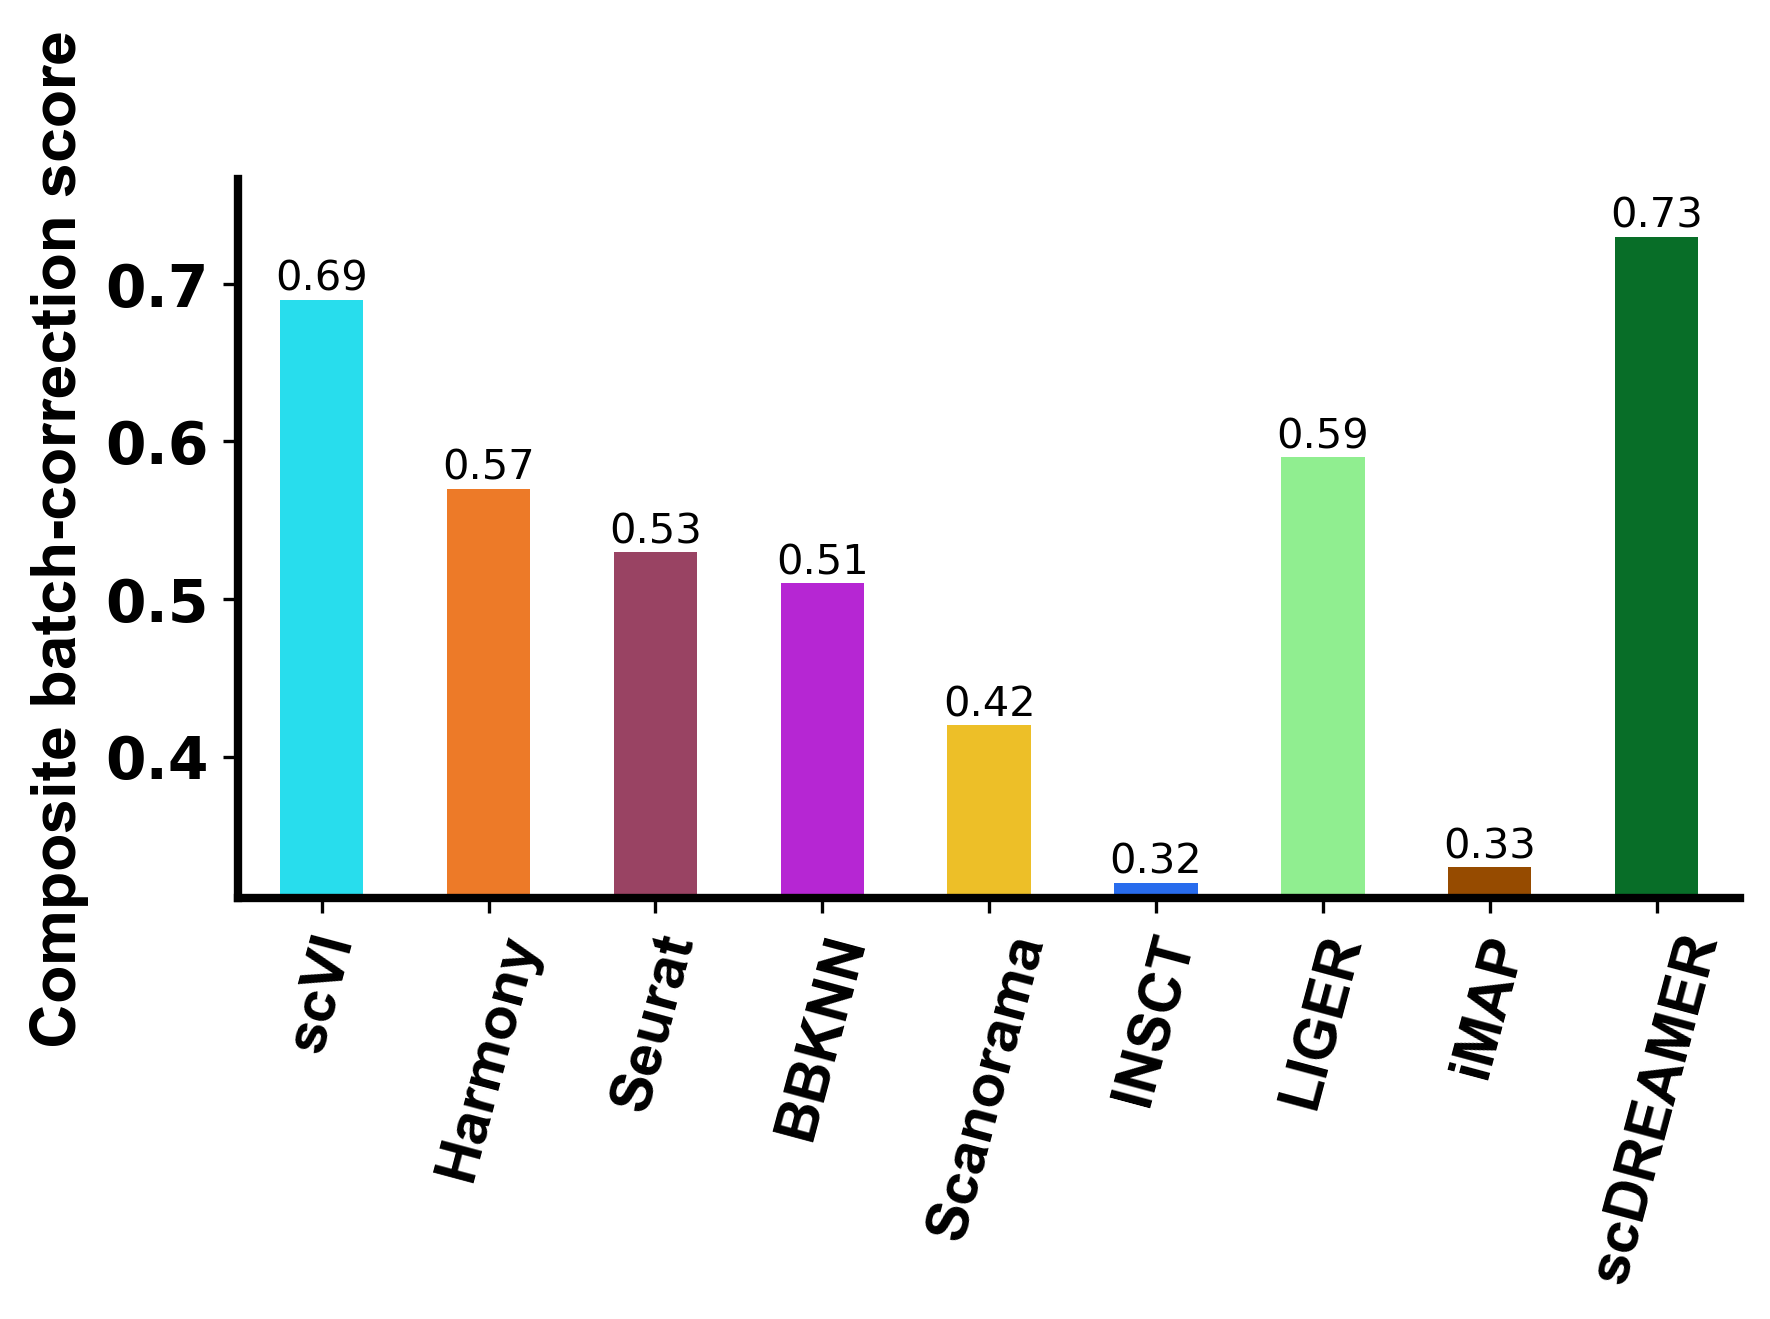

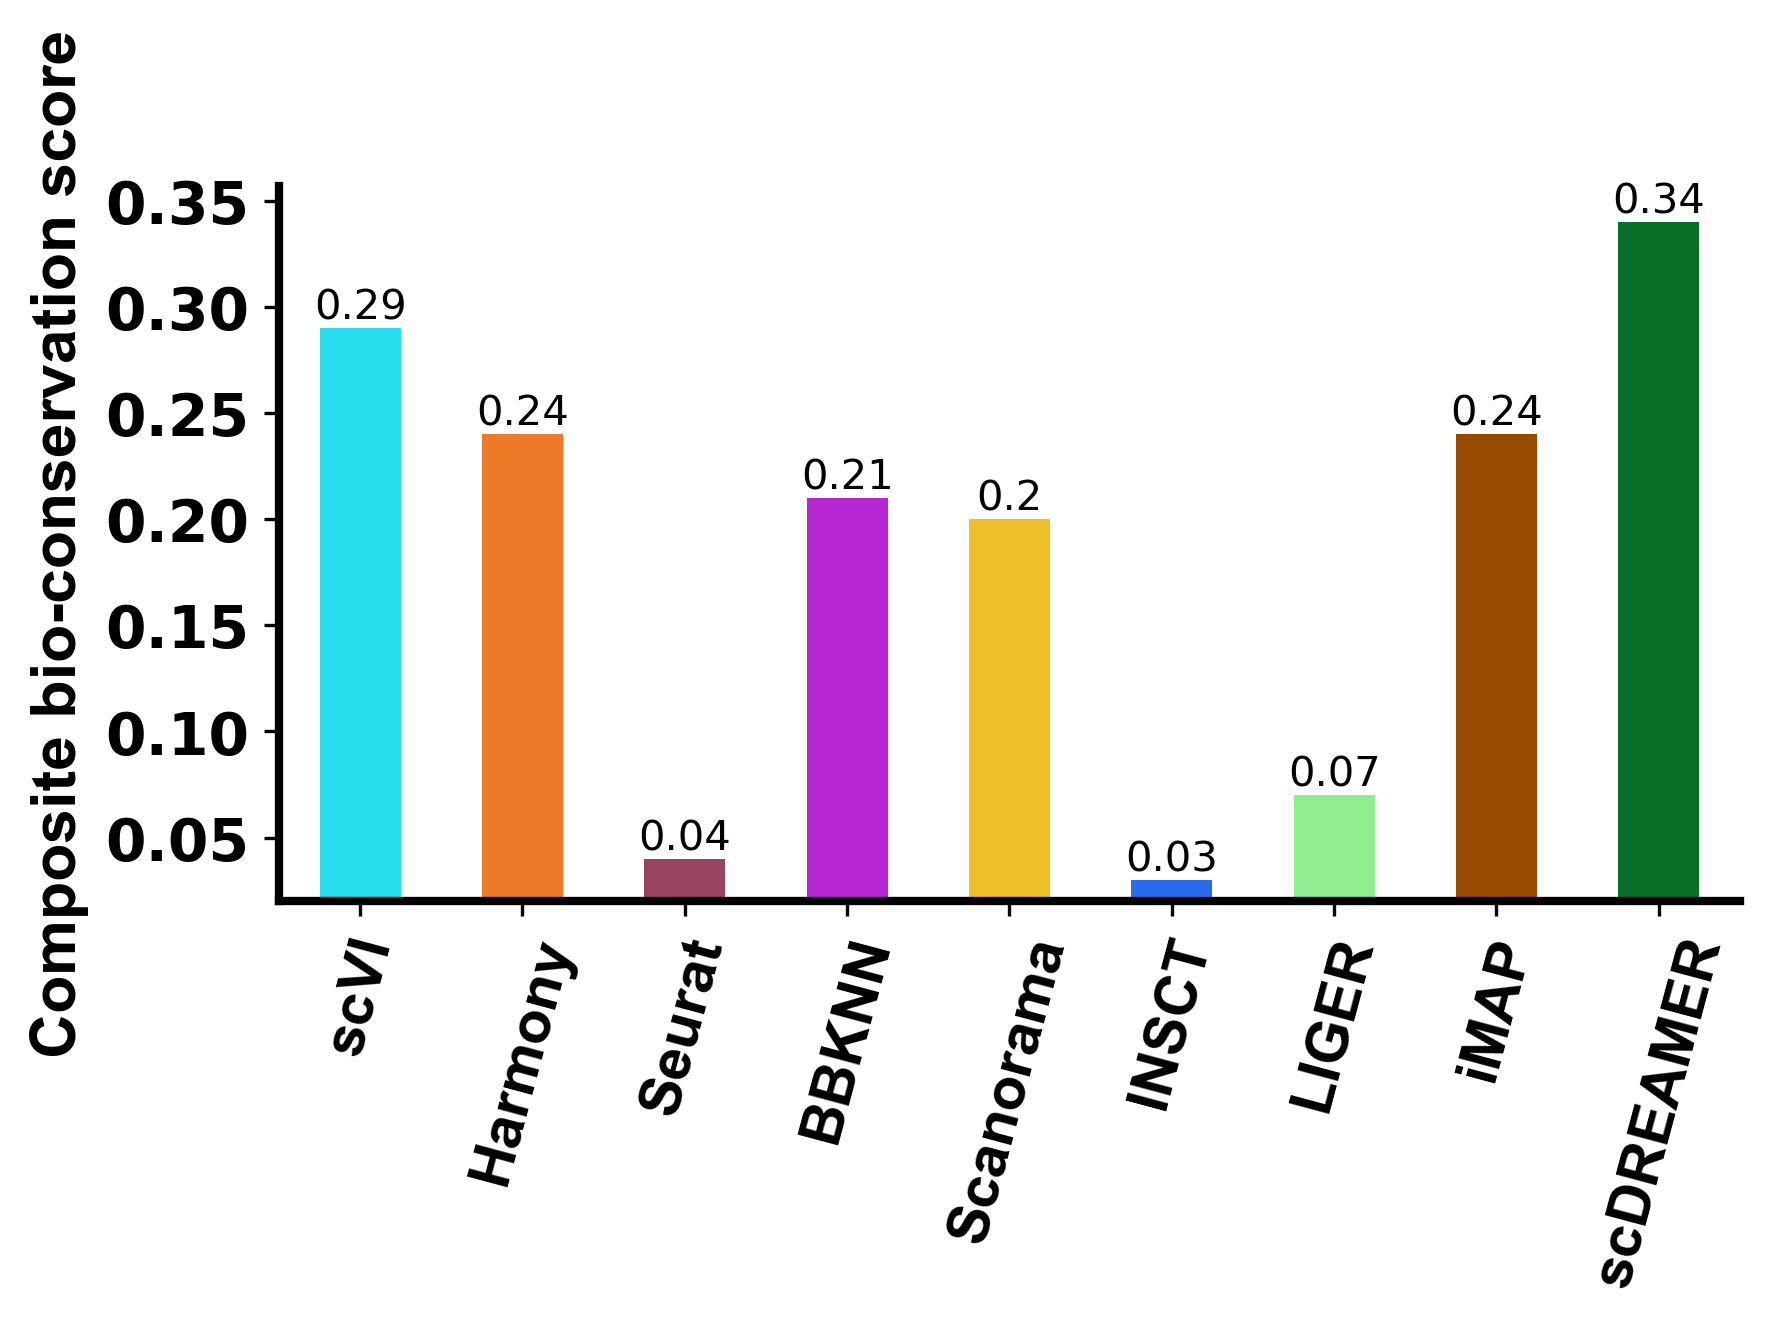

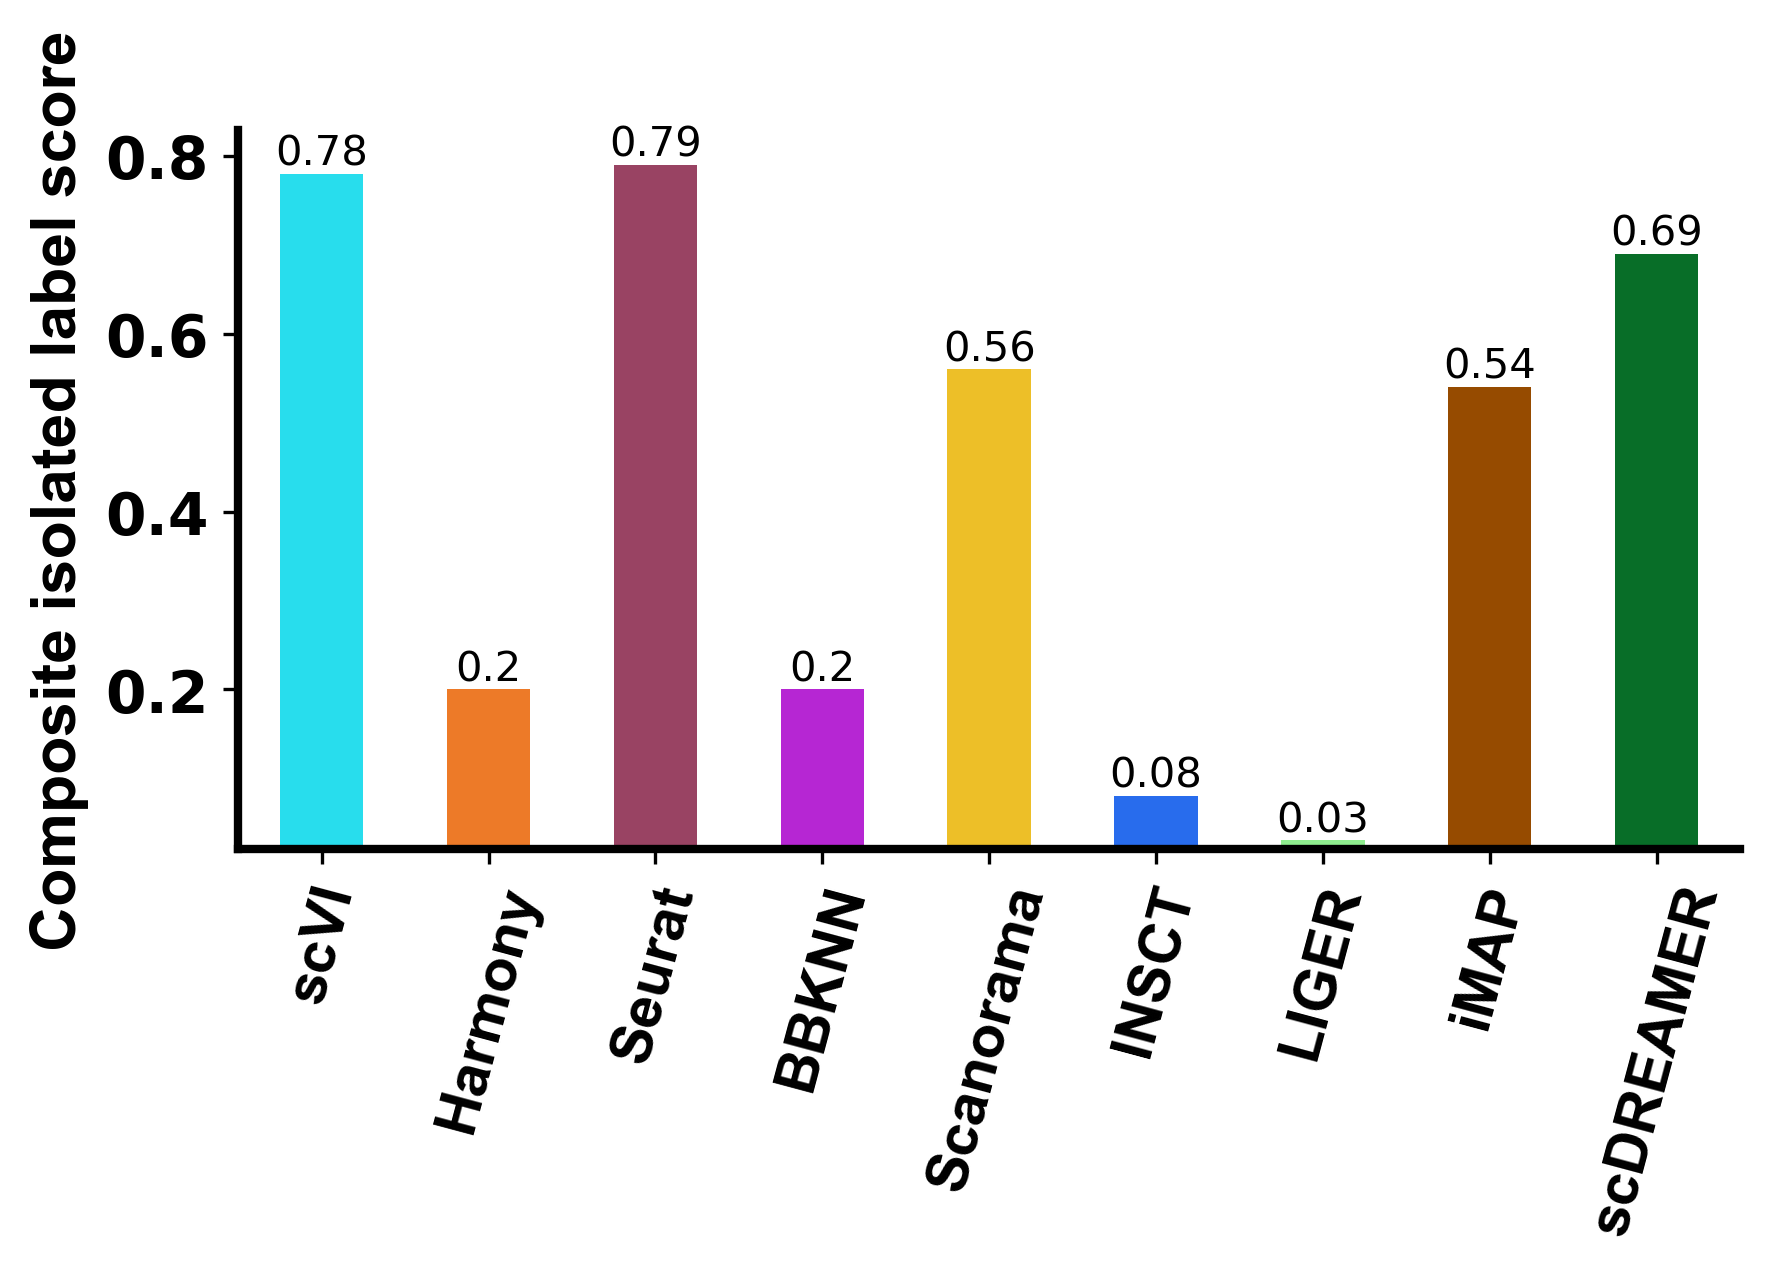

In [40]:
dataset = "Lung"
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
df_dataset  = df_dataset.loc[methods_to_plot,:]
df_dataset = calculate_composite(df_dataset)
display(df_dataset)
plot_composite(df_dataset,save_folder+dataset)

In [14]:
dataset = "Lung"
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
df_dataset  = df_dataset.loc[methods_to_plot,:]
df_dataset = calculate_composite(df_dataset)
df_dataset = df_dataset[["Composite bio-conservation score", "Composite batch-correction score",
                         "Composite isolated label score", "Combined composite score"]]
df_dataset.to_csv('./Composite_Scores/'+dataset+'_composite_scores.csv')

# Immune_Human

,NMI cluster/label,ARI cluster/label,ASW label,ASW label/batch,PCR batch,isolated f1 score,isolated silhouette coefficient,graph connectivity,kBET,iLISI,...,Percentage_wrong,trajectory,NMI k-means,comments,Unnamed: 17,color,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,,,,,,,,,,,,,,,,,,
scVI,0.36,0.65,0.37,0.69,0.97,0.73,0.77,0.92,0.01,0.31,...,0.0,0.88,0.70,NaN,NaN,#28DDED,0.46,0.65,0.75,0.55
Harmony,0.37,0.50,0.36,0.74,0.58,0.55,0.69,0.90,0.39,0.30,...,0.0,0.90,0.70,NaN,NaN,#ED7A28,0.41,0.65,0.62,0.53
Seurat,0.16,0.23,0.00,0.79,0.95,0.00,0.00,0.85,0.27,0.96,...,0.0,0.63,0.65,NaN,NaN,#994363,0.13,0.71,0.00,0.42
BBKNN,0.29,0.30,NaN,NaN,NaN,0.02,NaN,0.98,0.18,1.00,...,0.0,0.90,0.64,NaN,NaN,#B626D3,0.30,0.58,0.02,0.44
Scanorama,0.46,0.55,0.25,1.00,0.00,0.64,0.53,0.95,0.06,0.00,...,0.0,0.90,0.72,NaN,NaN,#EDBF28,0.42,0.50,0.58,0.46
INSCT,0.00,0.00,0.26,0.00,0.93,0.27,0.38,0.00,0.17,0.24,...,0.0,0.52,0.64,NaN,NaN,#286CED,0.09,0.28,0.33,0.18
LIGER,0.23,0.58,0.59,0.51,0.86,0.22,1.00,0.21,0.62,0.76,...,0.0,0.77,NaN,NaN,NaN,#90EE90,0.47,0.55,0.61,0.51
iMAP,0.37,0.54,0.21,0.79,0.74,0.48,0.45,0.94,0.00,0.42,...,0.0,0.88,NaN,NaN,NaN,#964B00,0.37,0.62,0.46,0.49
scDREAMER,0.46,0.67,0.42,0.77,1.00,0.62,0.71,0.92,0.54,0.52,...,0.0,0.88,NaN,250.0,NaN,#086E28,0.52,0.81,0.67,0.66


./Main_Figures/Immune_Human


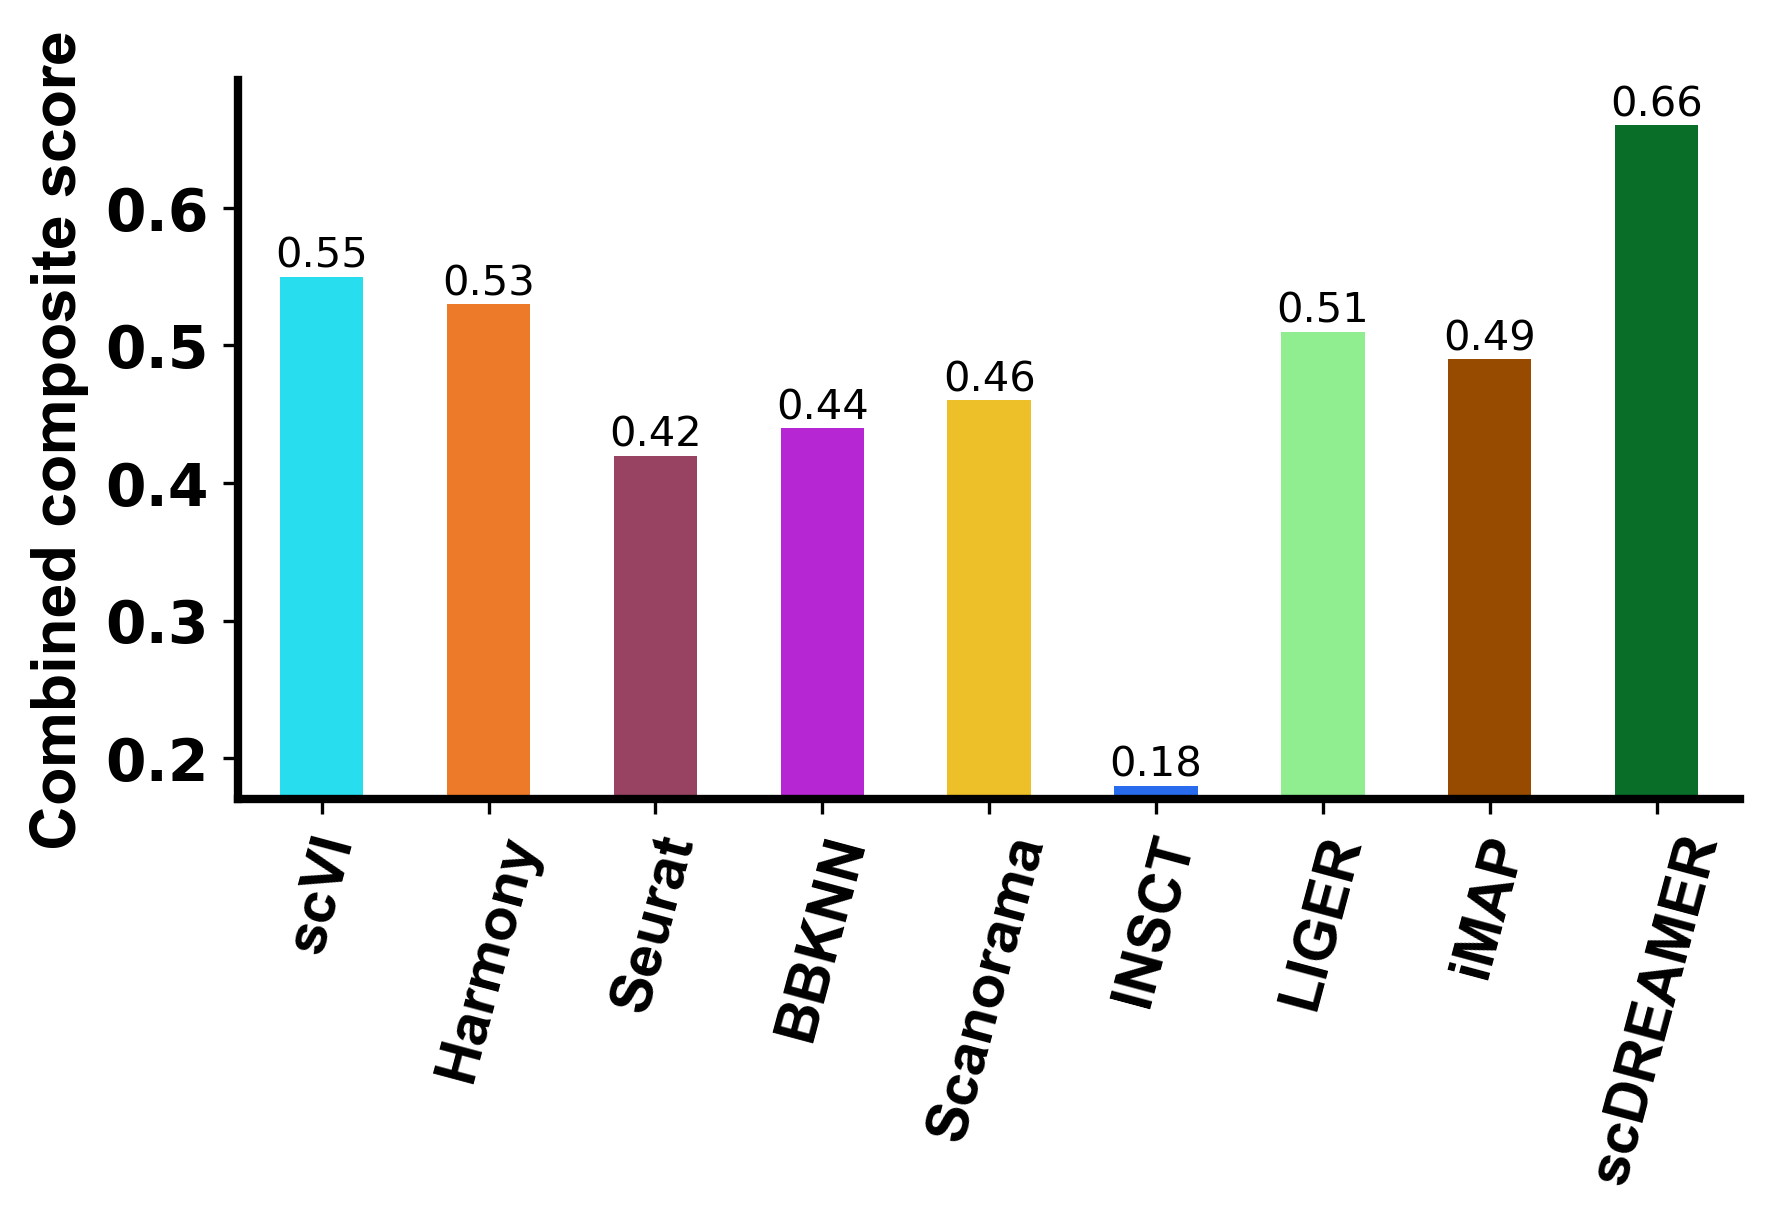

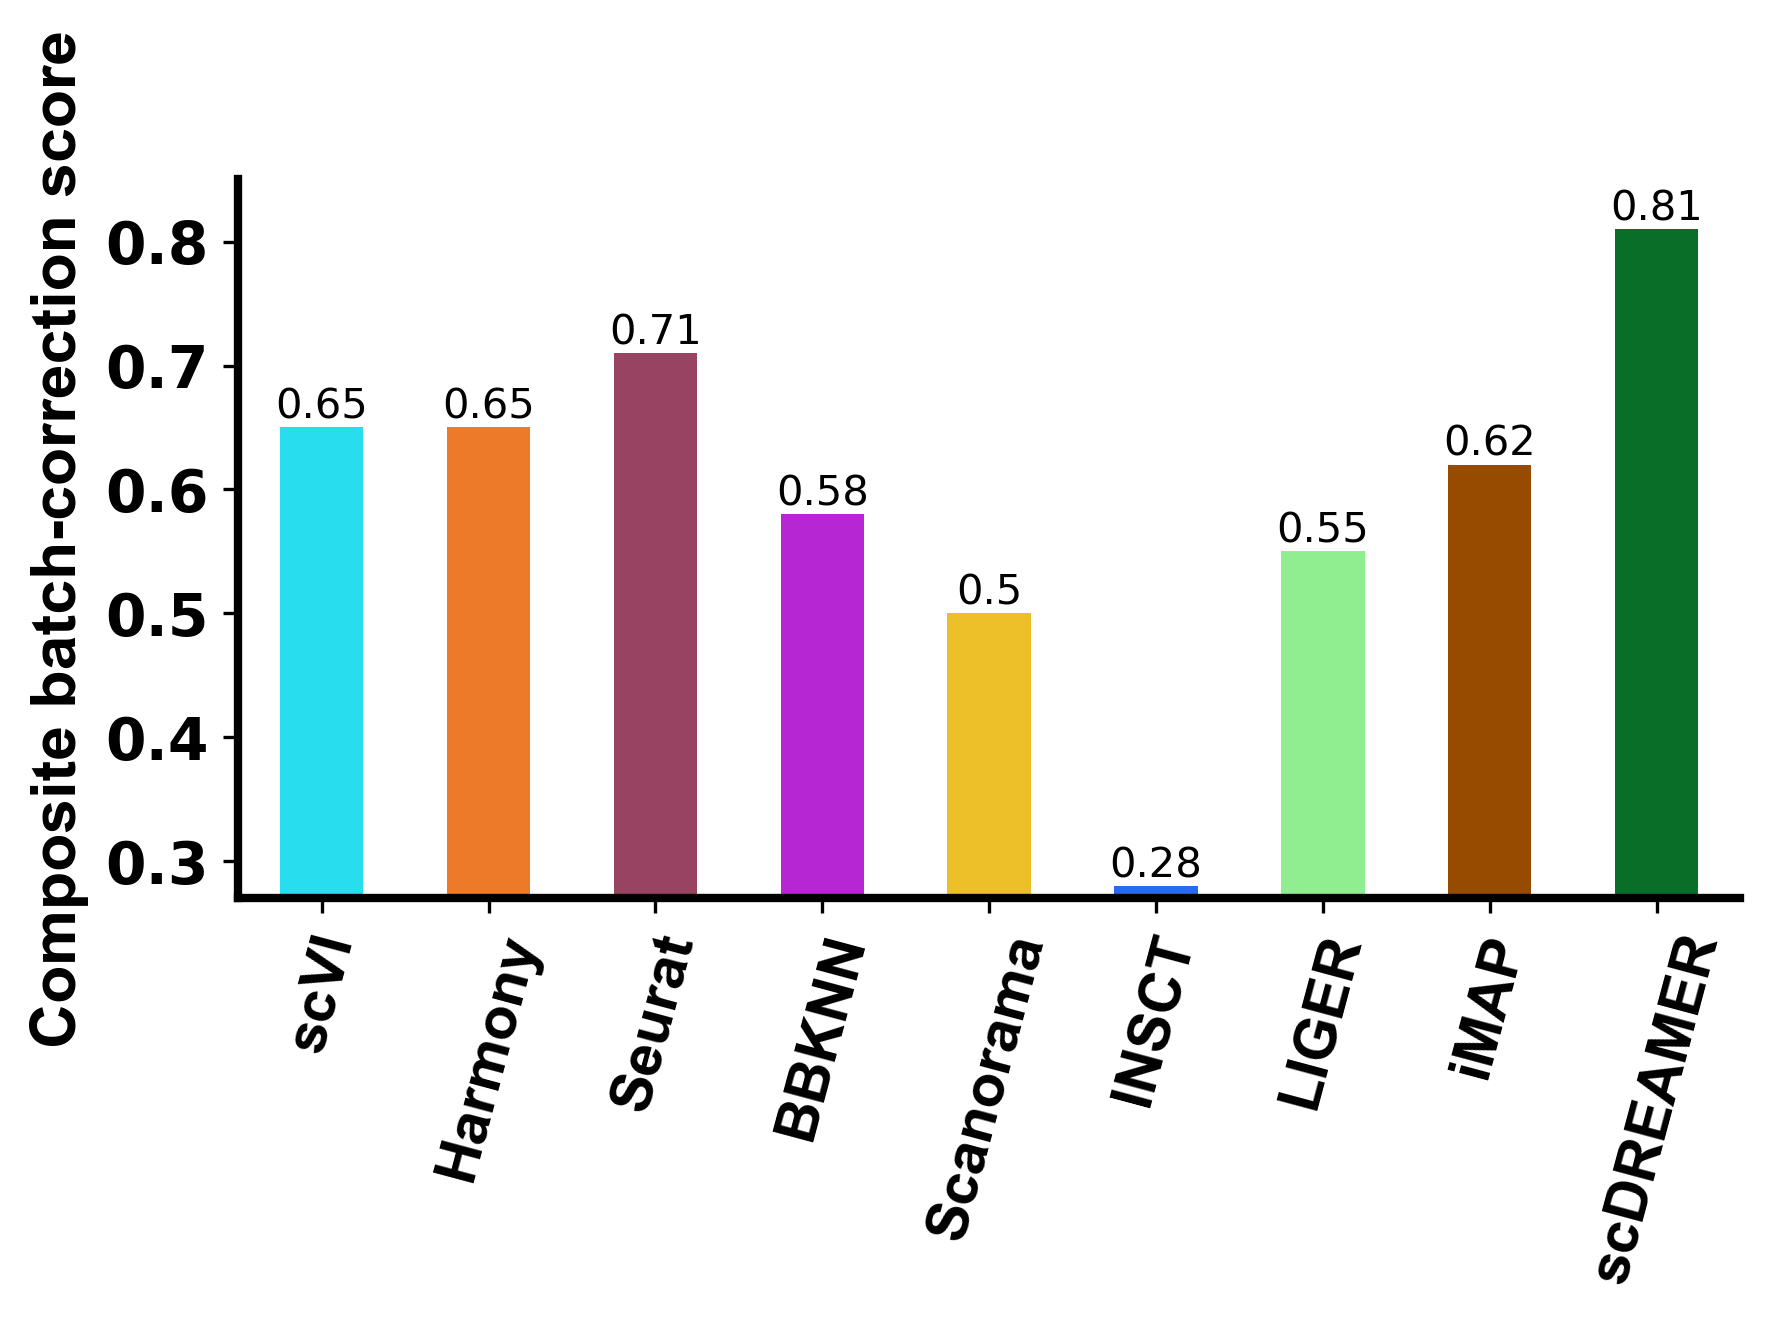

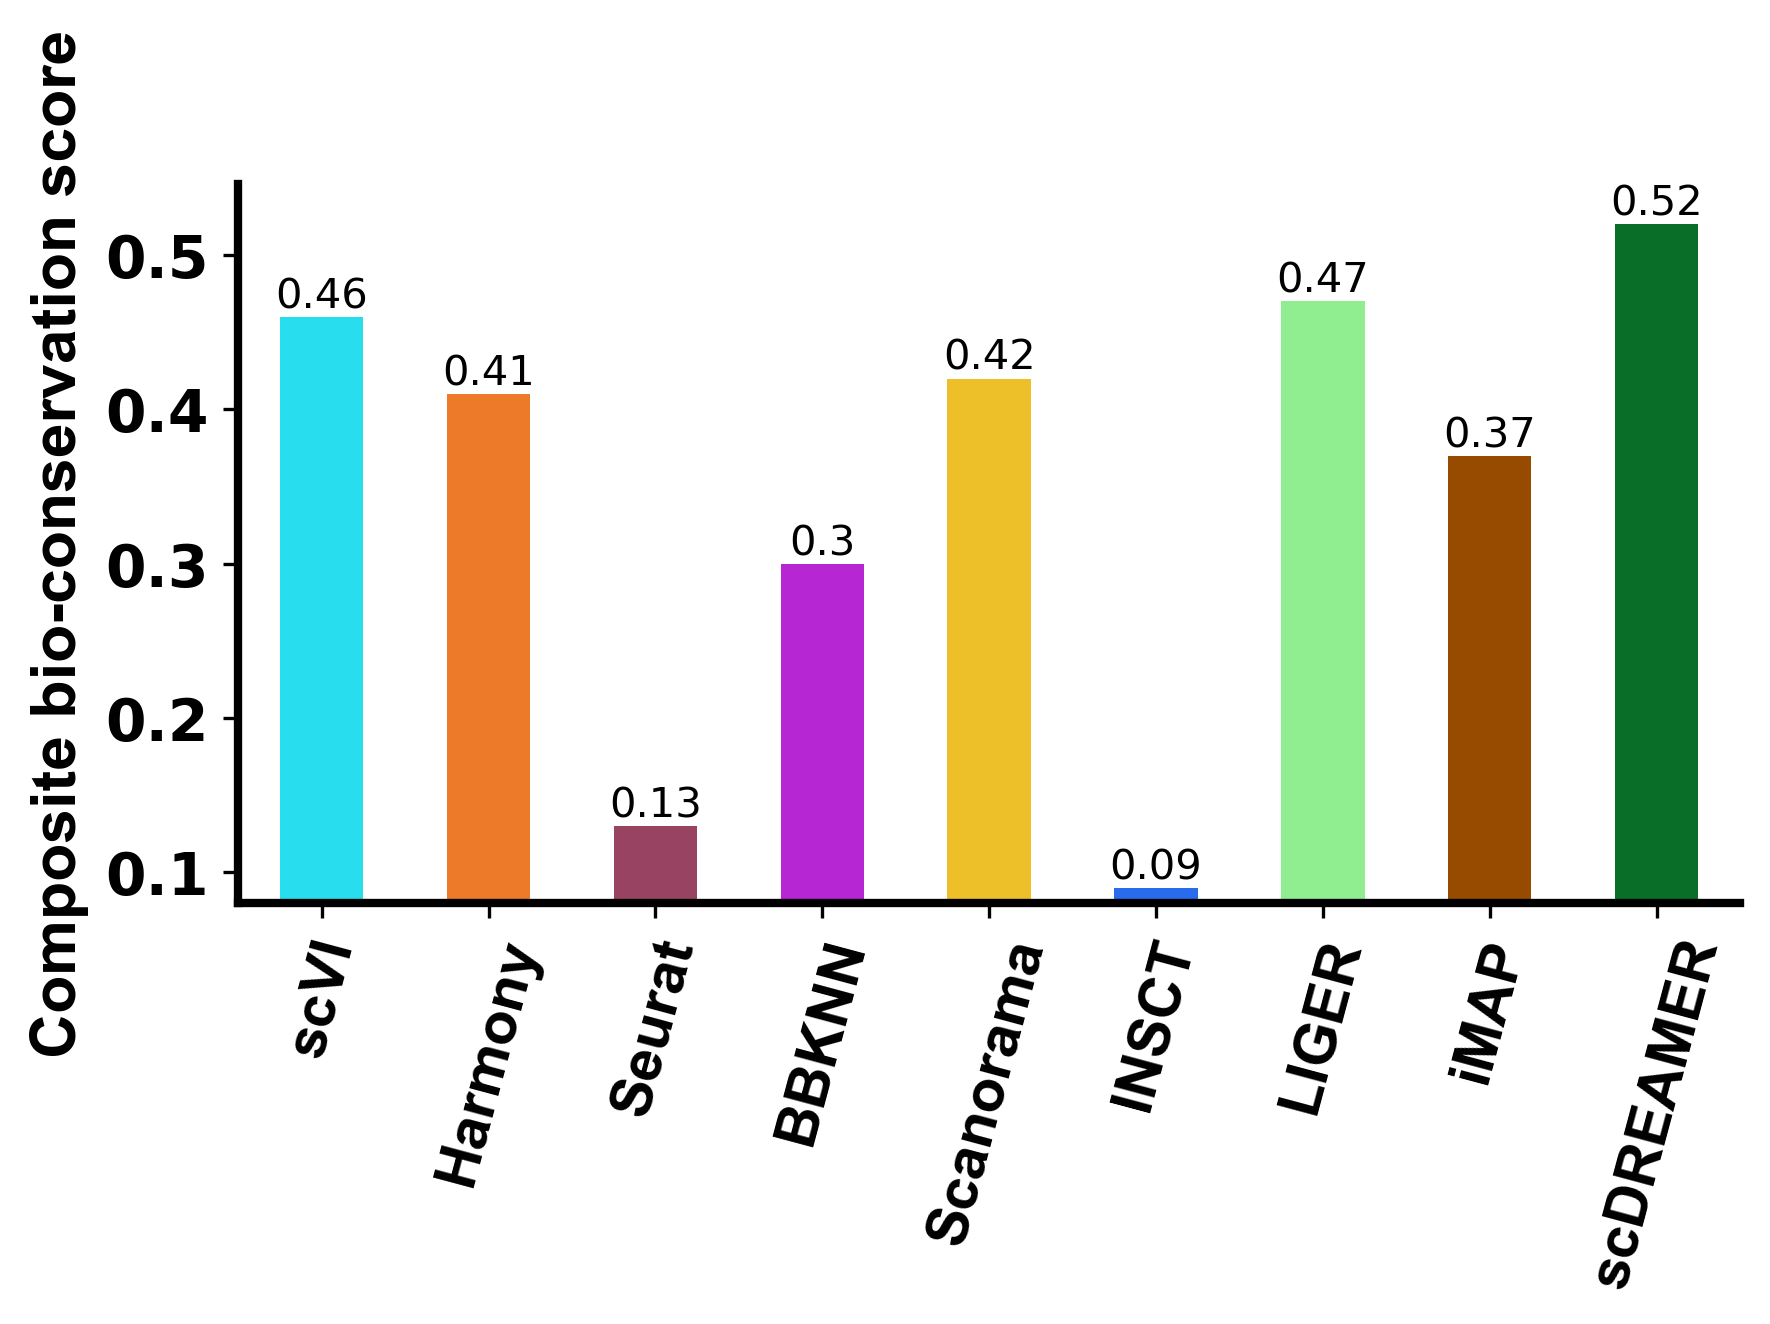

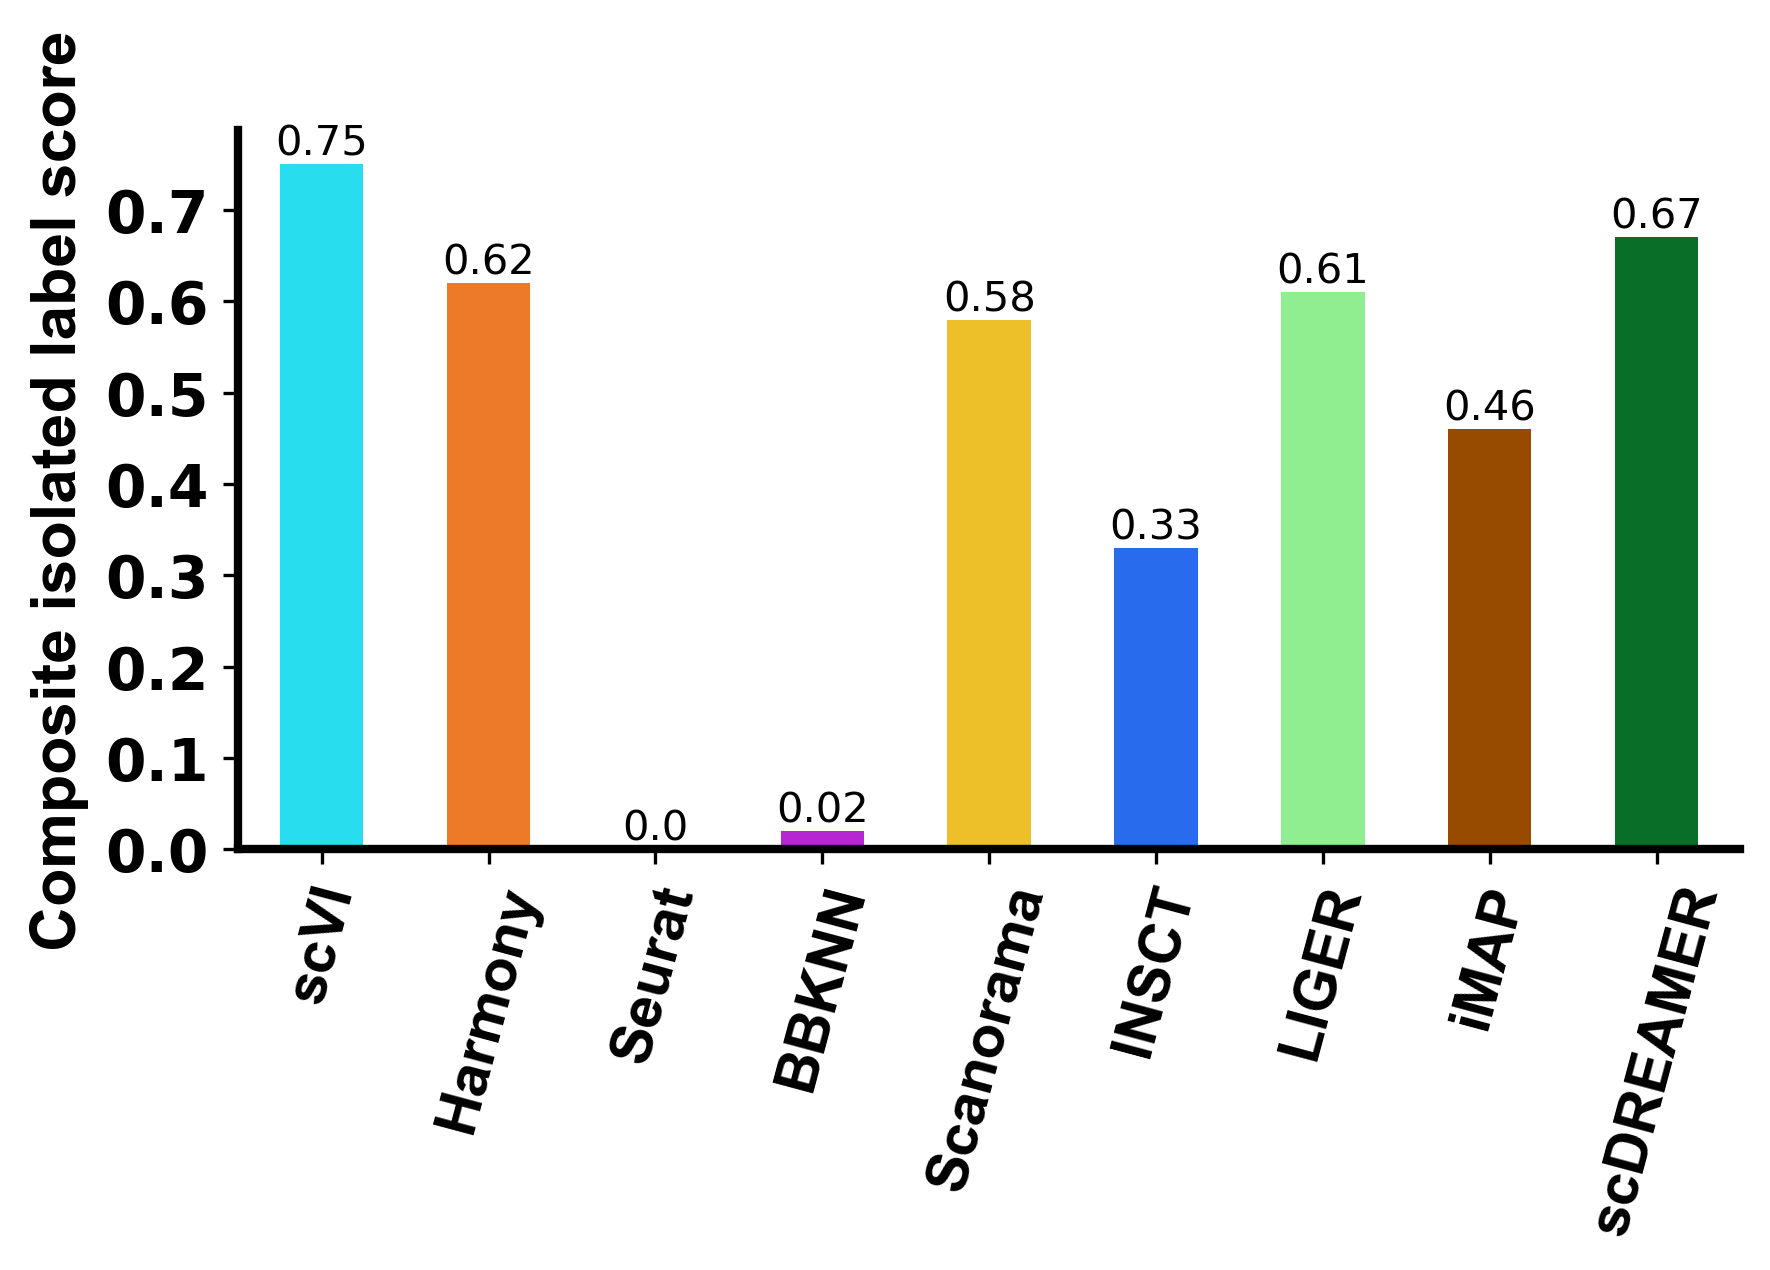

In [42]:
dataset = "Immune_Human"
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
df_dataset  = df_dataset.loc[methods_to_plot,:]
df_dataset = calculate_composite(df_dataset)
display(df_dataset)
plot_composite(df_dataset,save_folder+dataset)

In [15]:
dataset = "Immune_Human"
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale])
df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
df_dataset  = df_dataset.loc[methods_to_plot,:]
df_dataset = calculate_composite(df_dataset)
df_dataset = df_dataset[["Composite bio-conservation score", "Composite batch-correction score",
                         "Composite isolated label score", "Combined composite score"]]
df_dataset.to_csv('./Composite_Scores/'+dataset+'_composite_scores.csv')

# composite score ablation studies

In [49]:
datasets = ["Human_Mouse","Lung","Pancreas","Immune_Human","Human_Retina",]
sheet_name = 'Ablation'
save_folder = './Ablation/'
methods_to_plot = ['scDREAMER','scDREAMER-woDis','scDREAMER-woBC']
df = pd.read_excel(excel_path,sheet_name =sheet_name)
# display(df)
df = df.loc[df['Percentage_wrong']==0]
methods_to_scale_accross = set(df['Method'].unique()) - set(['scANVI','scGEN','scDREAMER-Sup','fastmnn'])
for dataset in datasets:
    df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
    df_dataset.index = df_dataset['Method']
    df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
    df_dataset.loc[methods_to_scale_accross,columns_to_scale] =scale(df_dataset.loc[methods_to_scale_accross,columns_to_scale])
    df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
    df_dataset  = df_dataset.loc[methods_to_plot,:]
    df_dataset = calculate_composite(df_dataset)
    df_dataset = df_dataset.loc[:,['Composite bio-conservation score','Composite batch-correction score','Composite isolated label score','Combined composite score']]
    print(dataset)
    display(df_dataset)

Human_Mouse


/home/krushna/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/krushna/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,
scDREAMER,0.98,0.77,NaN,0.88
scDREAMER-woDis,0.98,0.78,NaN,0.88
scDREAMER-woBC,1.00,0.46,NaN,0.73


Lung


,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,
scDREAMER,0.99,0.71,0.78,0.85
scDREAMER-woDis,0.40,0.70,0.65,0.55
scDREAMER-woBC,0.84,0.61,0.91,0.72


Pancreas


,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,
scDREAMER,0.96,0.83,0.93,0.89
scDREAMER-woDis,0.86,0.91,0.76,0.89
scDREAMER-woBC,0.81,0.71,0.70,0.76


Immune_Human


,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,
scDREAMER,0.91,0.85,0.78,0.88
scDREAMER-woDis,0.73,0.90,0.67,0.81
scDREAMER-woBC,0.75,0.68,0.70,0.72


Human_Retina


,Composite bio-conservation score,Composite batch-correction score,Composite isolated label score,Combined composite score
Method,,,,
scDREAMER,0.77,0.91,0.86,0.84
scDREAMER-woDis,0.72,0.88,0.55,0.80
scDREAMER-woBC,0.73,0.84,0.94,0.78


In [ ]:
# scVI - cyan
# Harmony - orange
# Seurat - magenta
# BBKNN - purple
# Scanorama - yellow
# INSCT - blue
# iMAP - brown
# Liger - light green
# fastMNN - light pink
# scANVI - removed from main figure
# scDREAMER - Green
# scDREAMER++ - Red

# scale with mini

In [83]:
# def scale_with_mini(df,min_values):
#     for col in df.columns:
#         scaler = MinMaxScaler(feature_range=(min_values[col],1))
#         df.loc[:,col] = scaler.fit_transform(np.array(df.loc[:,col]).reshape(-1,1))
#     return df
# df = pd.read_excel(excel_path,sheet_name =sheet_name)
# df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
# df_dataset.index = df_dataset['Method']
# df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
# mini_values = df_dataset.loc[:,columns_to_scale].min(axis = 0)
# df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
# df_dataset = df_dataset.loc[methods_to_plot,:]
# df_dataset.loc[:,columns_to_scale] =scale_with_mini(df_dataset.loc[:,columns_to_scale],mini_values)
# df_dataset

# scale normal or existing

In [84]:
# df = pd.read_excel(excel_path,sheet_name =sheet_name)
# df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
# df_dataset.index = df_dataset['Method']
# df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
# df_dataset = df_dataset.loc[df_dataset['Percentage_wrong']==0]
# df_dataset = df_dataset.loc[methods_to_plot,:]
# df_dataset.loc[:,columns_to_scale] =scale(df_dataset.loc[:,columns_to_scale]
# df_dataset)